In [218]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import os
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [219]:
#Location of your directory
print(os.getcwd())

C:\Users\balachp\Desktop


In [220]:
"""from google.colab import files
files.upload()"""

'from google.colab import files\nfiles.upload()'

In [221]:
a = pd.read_excel('Youtube_Train_Test.xlsx',sheet_name="Train")
b = pd.read_excel('Youtube_Train_Test.xlsx',sheet_name="Test")

In [222]:
print('The shape of our training set: %s poid and %s features'%(a.shape[0],a.shape[1]))
print('The shape of our testing set: %s poid and %s features'%(b.shape[0],b.shape[1]))
print('The testing set has 1 feature less than the training set, which is mediavalue, the target to predict  ')

The shape of our training set: 12886 poid and 25 features
The shape of our testing set: 3221 poid and 24 features
The testing set has 1 feature less than the training set, which is mediavalue, the target to predict  


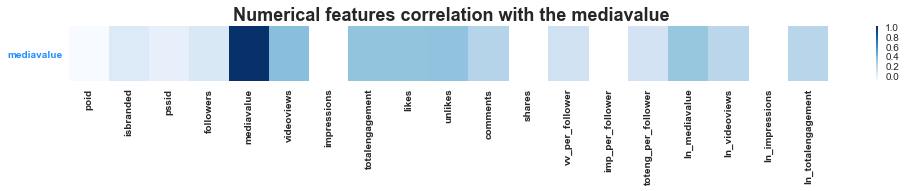

In [223]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['mediavalue'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the mediavalue", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [224]:
Num=numcorr['mediavalue'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,mediavalue
mediavalue,1
videoviews,0.371498
unlikes,0.352109
totalengagement,0.348416
likes,0.34738
ln_mediavalue,0.333537
comments,0.236717
ln_totalengagement,0.225765
ln_videoviews,0.220497
vv_per_follower,0.125669


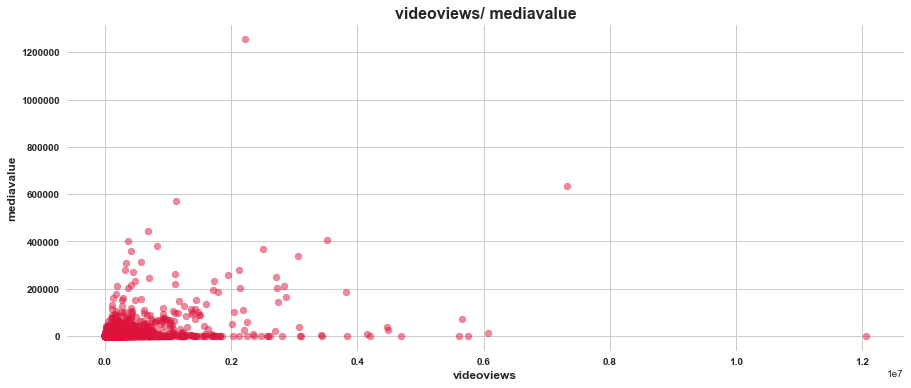

In [225]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['videoviews'], y=a['mediavalue'], color='crimson', alpha=0.5)
plt.title('videoviews/ mediavalue', weight='bold', fontsize=16)
plt.xlabel('videoviews', weight='bold', fontsize=12)
plt.ylabel('mediavalue', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

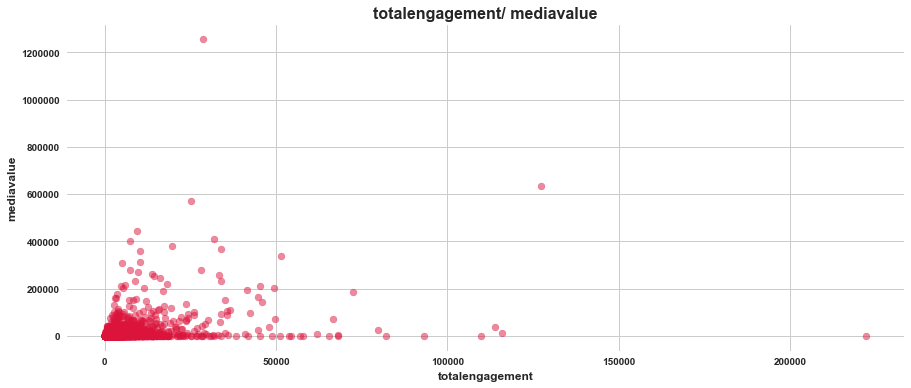

In [226]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['totalengagement'], y=a['mediavalue'], color='crimson', alpha=0.5)
plt.title('totalengagement/ mediavalue', weight='bold', fontsize=16)
plt.xlabel('totalengagement', weight='bold', fontsize=12)
plt.ylabel('mediavalue', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

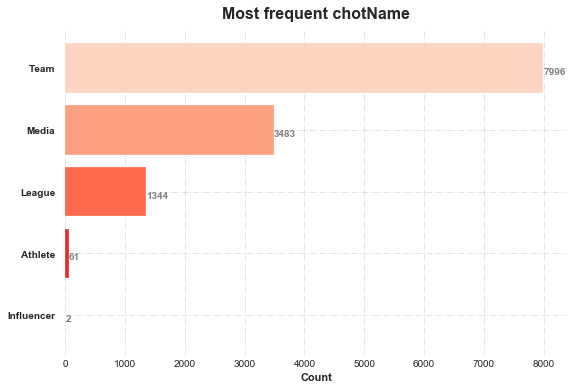

In [227]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.chotName.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Most frequent chotName',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()
# Show Plot
plt.show()

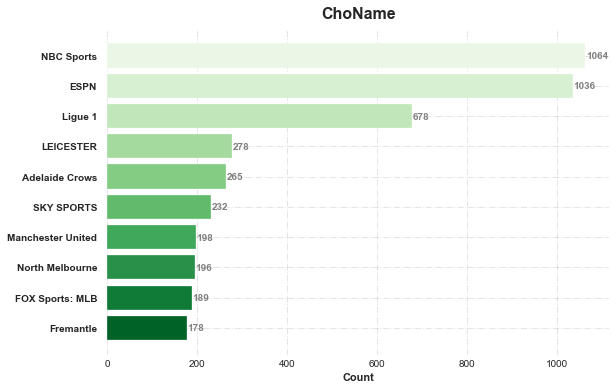

In [228]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.choName.value_counts().head(10).sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ChoName',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()

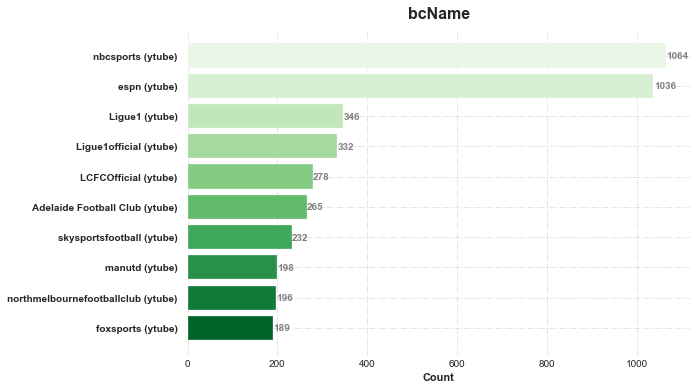

In [229]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.bcName.value_counts().head(10).sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('bcName',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()

In [230]:
na = a.shape[0]
print(na)
nb = b.shape[0]
print(nb)
y_train = a['mediavalue'].to_frame()
print(y_train.head())
#Combine train and test sets
c1 = pd.concat((a, b), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
print(c1.head())
c1.drop(['mediavalue'], axis=1, inplace=True)
#c1.drop(['Id'], axis=1, inplace=True)
print(f"Total size is {c1.shape}")

12886
3221
    mediavalue
0     2.677541
1  1179.249008
2   604.489232
3   185.336101
4   355.797381
       poid   pfName potName                  bcName          choName  \
0  63591239  YouTube   Video      fcnantestv (ytube)         FCNantes   
1  61438503  YouTube   Video  bleacherreport (ytube)  BLEACHER REPORT   
2  72618376  YouTube   Video    mcfcofficial (ytube)  Manchester City   
3  68016721  YouTube   Video             afl (ytube)              AFL   
4  60946921  YouTube   Video       nbcsports (ytube)       NBC Sports   

  chotName  isbranded  pssid             posttime  followers  ...  unlikes  \
0     Team          0    1.0  2020-02-26 11:04:47    30500.0  ...      1.0   
1    Media          0    1.0  2020-02-06 06:41:20  1720000.0  ...    120.0   
2     Team          0    1.0  2020-05-11 10:00:12  2490000.0  ...     38.0   
3   League          0    1.0  2020-04-07 08:00:29   180000.0  ...      4.0   
4    Media          0    1.0  2020-01-30 16:19:35  1150000.0  ...     

In [231]:
c1.head()

,poid,pfName,potName,bcName,choName,chotName,isbranded,pssid,posttime,followers,...,unlikes,comments,shares,vv_per_follower,imp_per_follower,toteng_per_follower,ln_mediavalue,ln_videoviews,ln_impressions,ln_totalengagement
0,63591239,YouTube,Video,fcnantestv (ytube),FCNantes,Team,0,1.0,2020-02-26 11:04:47,30500.0,...,1.0,4.0,0.0,0.05262,NaN,0.00203,0.984899,7.381502,NaN,4.143135
1,61438503,YouTube,Video,bleacherreport (ytube),BLEACHER REPORT,Media,0,1.0,2020-02-06 06:41:20,1720000.0,...,120.0,722.0,0.0,0.06521,NaN,0.00129,7.072633,11.627646,NaN,7.703910
2,72618376,YouTube,Video,mcfcofficial (ytube),Manchester City,Team,0,1.0,2020-05-11 10:00:12,2490000.0,...,38.0,159.0,0.0,0.02324,NaN,0.00084,6.404384,10.966110,NaN,7.645398
3,68016721,YouTube,Video,afl (ytube),AFL,League,0,1.0,2020-04-07 08:00:29,180000.0,...,4.0,25.0,0.0,0.04890,NaN,0.00129,5.222171,9.082848,NaN,5.455321
4,60946921,YouTube,Video,nbcsports (ytube),NBC Sports,Media,0,1.0,2020-01-30 16:19:35,1150000.0,...,17.0,133.0,0.0,0.02524,NaN,0.00030,5.874361,10.276051,NaN,5.843544


In [232]:
c1.shape

(16107, 24)

In [233]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

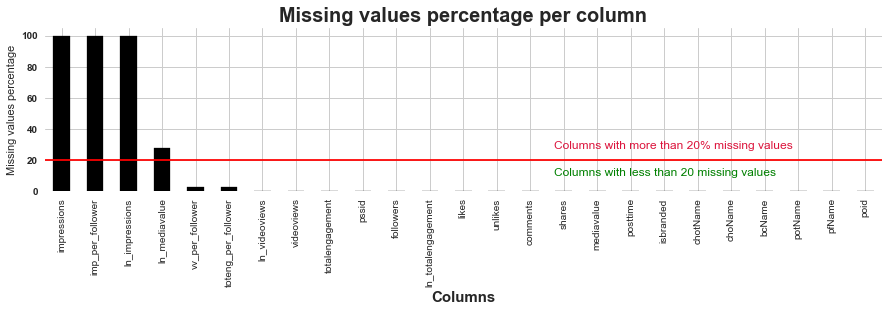

In [234]:
msv1(a)

In [235]:
c=c1.dropna(thresh=len(a)*0.8, axis=1)
print(f"We dropped {a.shape[1]-c.shape[1]} features in the combined set")

We dropped 4 features in the combined set


In [236]:
allna = (c.isnull().sum() / len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage per column', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

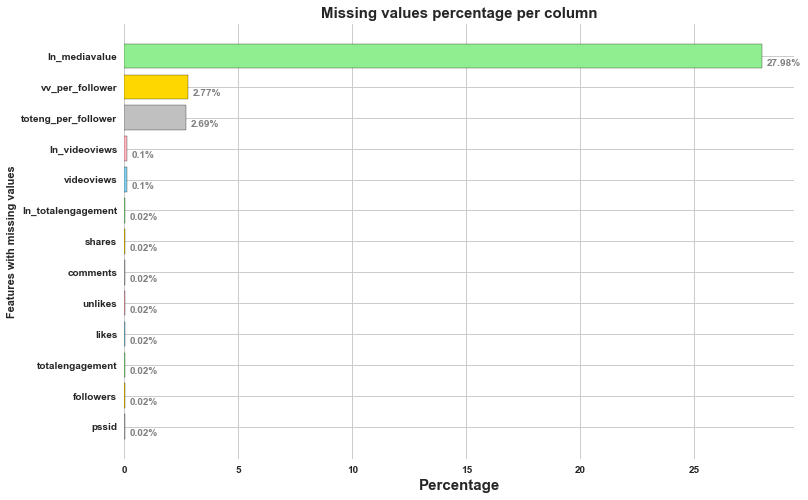

In [237]:
msv2(c)

In [238]:
print(f'The shape of the combined dataset after dropping features with more than 80% M.V. {c.shape}')

The shape of the combined dataset after dropping features with more than 80% M.V. (16107, 21)


In [239]:
NA=c[allna.index.to_list()]

In [240]:
NA.shape

(16107, 13)

In [241]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(f'We have :{NAcat.shape[1]} categorical features with missing values')
print(f'We have :{NAnum.shape[1]} numerical features with missing values')

We have :0 categorical features with missing values
We have :13 numerical features with missing values


In [242]:
NAnum.head()

,pssid,followers,totalengagement,likes,unlikes,comments,shares,ln_totalengagement,videoviews,ln_videoviews,toteng_per_follower,vv_per_follower,ln_mediavalue
0,1.0,30500.0,62.0,57.0,1.0,4.0,0.0,4.143135,1605.0,7.381502,0.00203,0.05262,0.984899
1,1.0,1720000.0,2216.0,1374.0,120.0,722.0,0.0,7.703910,112155.0,11.627646,0.00129,0.06521,7.072633
2,1.0,2490000.0,2090.0,1893.0,38.0,159.0,0.0,7.645398,57878.0,10.966110,0.00084,0.02324,6.404384
3,1.0,180000.0,233.0,204.0,4.0,25.0,0.0,5.455321,8802.0,9.082848,0.00129,0.04890,5.222171
4,1.0,1150000.0,344.0,194.0,17.0,133.0,0.0,5.843544,29028.0,10.276051,0.00030,0.02524,5.874361


In [243]:
NAnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16107 entries, 0 to 16106
Data columns (total 13 columns):
pssid                  16104 non-null float64
followers              16104 non-null float64
totalengagement        16104 non-null float64
likes                  16104 non-null float64
unlikes                16104 non-null float64
comments               16104 non-null float64
shares                 16104 non-null float64
ln_totalengagement     16104 non-null float64
videoviews             16091 non-null float64
ln_videoviews          16091 non-null float64
toteng_per_follower    15674 non-null float64
vv_per_follower        15661 non-null float64
ln_mediavalue          11601 non-null float64
dtypes: float64(13)
memory usage: 1.6 MB


In [244]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['videoviews']=c.videoviews.fillna(0)
#LotFrontage has 16% totalengagement values. We fill with the median
c['totalengagement']=c.totalengagement.fillna(0)
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
#c['ln_totalengagement']=c["ln_totalengagement"].fillna(0)
#c = c.dropna(axis=0, subset=['pssid'])

In [245]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16107 entries, 0 to 16106
Data columns (total 21 columns):
poid                   16107 non-null int64
pfName                 16107 non-null object
potName                16107 non-null object
bcName                 16107 non-null object
choName                16107 non-null object
chotName               16107 non-null object
isbranded              16107 non-null int64
pssid                  16104 non-null float64
posttime               16107 non-null object
followers              16104 non-null float64
videoviews             16107 non-null float64
totalengagement        16107 non-null float64
likes                  16104 non-null float64
unlikes                16104 non-null float64
comments               16104 non-null float64
shares                 16104 non-null float64
vv_per_follower        15661 non-null float64
toteng_per_follower    15674 non-null float64
ln_mediavalue          11601 non-null float64
ln_videoviews          1609

In [246]:
NAcat.head()

""
0
1
2
3
4


In [247]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

0


In [248]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [249]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [250]:
c.isnull().sum().sort_values(ascending=False).head()

ln_totalengagement    0
followers             0
pfName                0
potName               0
bcName                0
dtype: int64

In [251]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16107 entries, 0 to 16106
Data columns (total 21 columns):
poid                   16107 non-null int64
pfName                 16107 non-null object
potName                16107 non-null object
bcName                 16107 non-null object
choName                16107 non-null object
chotName               16107 non-null object
isbranded              16107 non-null int64
pssid                  16107 non-null float64
posttime               16107 non-null object
followers              16107 non-null float64
videoviews             16107 non-null float64
totalengagement        16107 non-null float64
likes                  16107 non-null float64
unlikes                16107 non-null float64
comments               16107 non-null float64
shares                 16107 non-null float64
vv_per_follower        16107 non-null float64
toteng_per_follower    16107 non-null float64
ln_mediavalue          16107 non-null float64
ln_videoviews          1610

In [252]:
c.drop(['poid','pfName',"potName",'bcName','choName', 'posttime',"vv_per_follower","toteng_per_follower","ln_videoviews","ln_totalengagement","ln_mediavalue"], axis=1,inplace = True)

In [253]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16107 entries, 0 to 16106
Data columns (total 10 columns):
chotName           16107 non-null object
isbranded          16107 non-null int64
pssid              16107 non-null float64
followers          16107 non-null float64
videoviews         16107 non-null float64
totalengagement    16107 non-null float64
likes              16107 non-null float64
unlikes            16107 non-null float64
comments           16107 non-null float64
shares             16107 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.2+ MB


In [254]:
c['totalengagement'] = c['likes'] + c['unlikes'] + c['comments'] + c['shares']

In [255]:
cb=pd.get_dummies(c)
print(f"the shape of the original dataset {c.shape}")
print(f"the shape of the encoded dataset {cb.shape}")
print(f"We have {cb.shape[1]- c.shape[1]} new encoded features")

the shape of the original dataset (16107, 10)
the shape of the encoded dataset (16107, 14)
We have 4 new encoded features


In [256]:
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 

In [257]:
Train.head()

,isbranded,pssid,followers,videoviews,totalengagement,likes,unlikes,comments,shares,chotName_Athlete,chotName_Influencer,chotName_League,chotName_Media,chotName_Team
0,0,1.0,30500.0,1605.0,62.0,57.0,1.0,4.0,0.0,0,0,0,0,1
1,0,1.0,1720000.0,112155.0,2216.0,1374.0,120.0,722.0,0.0,0,0,0,1,0
2,0,1.0,2490000.0,57878.0,2090.0,1893.0,38.0,159.0,0.0,0,0,0,0,1
3,0,1.0,180000.0,8802.0,233.0,204.0,4.0,25.0,0.0,0,0,1,0,0
4,0,1.0,1150000.0,29028.0,344.0,194.0,17.0,133.0,0.0,0,0,0,1,0


In [258]:
Train.shape

(12886, 14)

In [259]:
Test.shape

(3221, 14)

Text(0.5, 1.0, 'totalengagement - mediavalue')

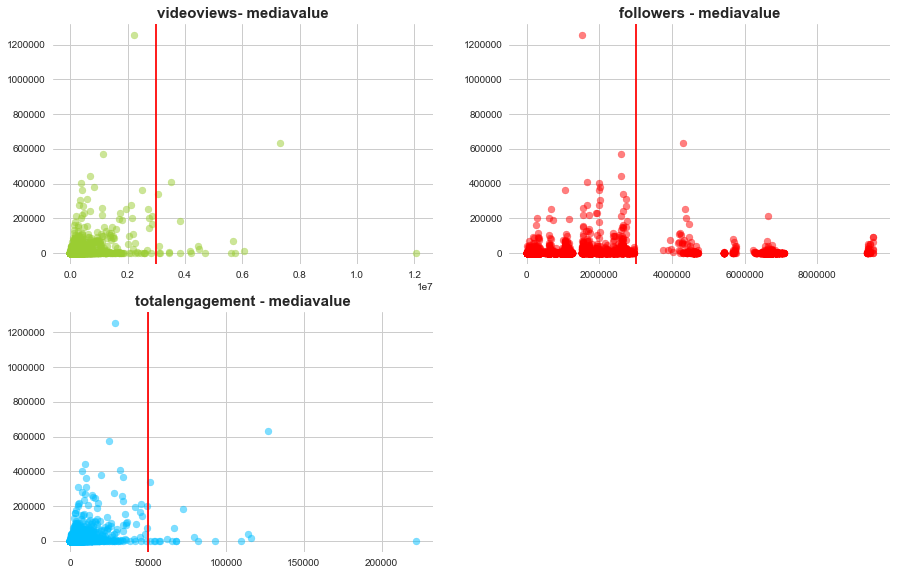

In [260]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=a['videoviews'], y=a['mediavalue'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=3000000, color='r', linestyle='-')
plt.title('videoviews- mediavalue', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=a['followers'], y=a['mediavalue'], color=('red'),alpha=0.5)
plt.axvline(x=3000000, color='r', linestyle='-')
plt.title('followers - mediavalue', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=a['totalengagement'], y=a['mediavalue'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=50000, color='r', linestyle='-')
plt.title('totalengagement - mediavalue', fontsize=15, weight='bold' )


In [261]:
train= Train
#Train[(Train['videoviews'] < 12000000) & (Train['totalengagement'] < 222100)]

#print(f'We removed {Train.shape[0]- train.shape[0]} outliers')

In [262]:
target=a[['mediavalue']]
#target.loc[5443]

In [263]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  12886 rows
Target: 12886 rows


In [264]:
print("Skewness before log transform: ", a['totalengagement'].skew())
print("Kurtosis before log transform: ", a['totalengagement'].kurt())

Skewness before log transform:  16.432195109858945
Kurtosis before log transform:  485.1393627968177


In [265]:
print("Skewness before log transform: ", a['followers'].skew())
print("Kurtosis before log transform: ", a['followers'].kurt())

Skewness before log transform:  2.2133916508812184
Kurtosis before log transform:  3.9010516533665065


In [266]:
print("Skewness before log transform: ", a['videoviews'].skew())
print("Kurtosis before log transform: ", a['videoviews'].kurt())

Skewness before log transform:  15.279340319398164
Kurtosis before log transform:  411.66901974265335


In [267]:
print("Skewness before log transform: ", a['mediavalue'].skew())
print("Kurtosis before log transform: ", a['mediavalue'].kurt())

Skewness before log transform:  27.247748557349592
Kurtosis before log transform:  1211.5492599395661


In [268]:
from scipy.stats import skew

numeric_feats = c.dtypes[c.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])



In [269]:
print(f"Skewness after log transform: {train['videoviews'].skew()}")
print(f"Kurtosis after log transform: {train['videoviews'].kurt()}")

Skewness after log transform: 0.3215646642874943
Kurtosis after log transform: -0.6738003330532041


In [270]:
print(f"Skewness before log transform: {target['mediavalue'].skew()}")
print(f"Kurtosis before log transform: {target['mediavalue'].kurt()}")

Skewness before log transform: 27.247748557349592
Kurtosis before log transform: 1211.5492599395661


In [271]:
#log transform the target:
target["mediavalue"] = np.log1p(target["mediavalue"])

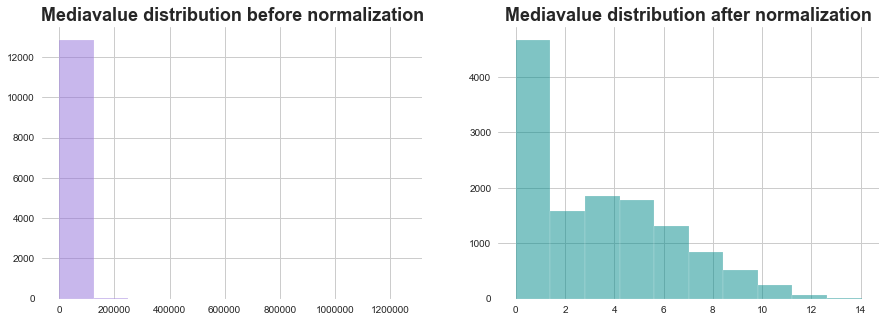

In [272]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.mediavalue, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Mediavalue distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.mediavalue, bins=10, color='darkcyan',alpha=0.5)
plt.title('Mediavalue distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [273]:
print(f"Skewness after log transform: {target['mediavalue'].skew()}")
print(f"Kurtosis after log transform: {target['mediavalue'].kurt()}")

Skewness after log transform: 0.5981470700095135
Kurtosis after log transform: -0.5472542047386479


In [274]:
x=train
#y=np.array(target)
y=target["mediavalue"]

In [275]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

In [276]:
x_train

,isbranded,pssid,followers,videoviews,totalengagement,likes,unlikes,comments,shares,chotName_Athlete,chotName_Influencer,chotName_League,chotName_Media,chotName_Team
12510,0.0,0.693147,9.196343,5.762051,3.178054,3.091042,0.000000,1.098612,0.0,0,0,0,0,1
9985,0.0,0.693147,15.659230,10.864140,6.456770,6.180017,3.044522,4.905275,0.0,0,0,0,1,0
4872,0.0,0.693147,9.071193,7.945910,5.170484,4.990433,1.386294,3.295837,0.0,0,0,0,0,1
8311,0.0,0.693147,12.517231,7.415777,2.639057,2.484907,0.693147,0.693147,0.0,0,0,1,0,0
10909,0.0,0.693147,13.272508,7.320527,4.060443,3.970292,0.000000,1.791759,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.0,0.693147,15.694976,10.994303,7.101676,6.726233,3.871201,5.811141,0.0,0,0,0,1,0
3264,0.0,0.693147,11.318139,8.311890,4.919981,4.820282,1.386294,2.397895,0.0,0,0,0,0,1
9845,0.0,0.693147,13.620713,7.016610,3.806662,3.663562,0.693147,1.791759,0.0,0,0,0,1,0
10799,0.0,0.693147,14.253766,7.978654,4.174387,4.110874,0.693147,1.386294,0.0,0,0,1,0,0


In [277]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

In [278]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-6.604089840164813
RMSE = 2.569842376521333


In [279]:
def score(y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))

In [280]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")
print(f"The best score achieved with Alpha=7 is: {math.sqrt(-ridge_reg.best_score_)}")
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is: {'alpha': 3}
The best score achieved with Alpha=7 is: 2.5773056310562947


In [281]:
ridge_mod=Ridge(alpha=7)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print(f'Root Mean Square Error train =  {str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)))}')
print(f'Root Mean Square Error test =  {score(y_pred_test)}')

Root Mean Square Error train =  2.5738653427000076
Root Mean Square Error test =  2.561655010759231


In [282]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')

The best value of Alpha is: {'alpha': 0.0009}


In [283]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print(f'Root Mean Square Error train  {str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))}')
print(f'Root Mean Square Error test  {score(y_lasso_test)}')

Root Mean Square Error train  2.573868606899944
Root Mean Square Error test  2.5615642124339733


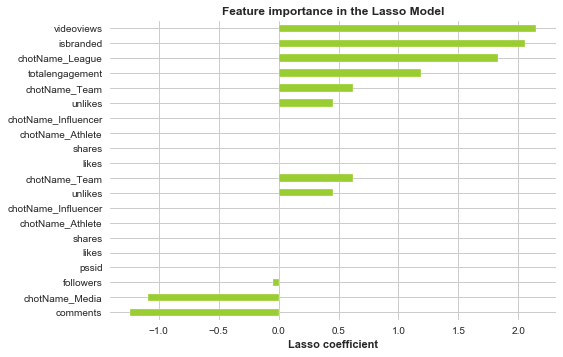

In [284]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [285]:

print(f"Lasso kept {sum(coefs != 0)} important features and dropped the other  {sum(coefs == 0)} features")

Lasso kept 9 important features and dropped the other  5 features


In [286]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.0001]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print(f'Root Mean Square Error test = {score(ela_pred)}')
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)

Root Mean Square Error test = 2.560594618573349
0.0001
0.1


In [287]:
def regularization(x,y,modelo=Ridge, scaler=RobustScaler):
    """"
    Function to automate regression with regularization techniques:
    
    -x: the features
    -y: the target
    -modelo: Ridge(default), Lasso, ElasticNetCV
    -scaler: RobustScaler(default), MinMaxSclaer, StandardScaler
    
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    Contact: amineyamlahi@gmail.com
    """
    #Split the data to train/test
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)
    
    #Scale the data. RobustSclaer default
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    
    scaler= scaler()
    # transform "x_train"
    x_train = scaler.fit_transform(x_train)
    # transform "x_test"
    x_test = scaler.transform(x_test)
    #Transform the test set
    X_test= scaler.transform(Test)
    
    if modelo != ElasticNetCV:
        if modelo == Ridge:
            parameters= {'alpha':[x for x in range(1,101)]}
        elif modelo == Lasso:
            parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
            
        model=modelo()
            
        model=ms.GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
        model.fit(x_train,y_train)
        y_pred= model.predict(x_test)

        #print("The best value of Alpha is: ",model.best_params_)
        print("The best RMSE score achieved with %s is: %s " %(model.best_params_,
                  score(y_pred)))
    elif modelo == ElasticNetCV:
        alphas = [0.0001]
        l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

        elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

        elasticmod = elastic_cv.fit(x_train, y_train.ravel())
        ela_pred=elasticmod.predict(x_test)
        print("The best RMSE score achieved with alpha %s and l1_ratio %s is: %s "
              %(elastic_cv.alpha_,elastic_cv.l1_ratio_, score(ela_pred)))
        
            

In [288]:
regularization(x,y,Ridge)

The best RMSE score achieved with {'alpha': 3} is: 2.561109440643863 


In [289]:
regularization(x,y, Lasso)

The best RMSE score achieved with {'alpha': 0.0009} is: 2.5615642124339733 


In [290]:
regularization(x,y, ElasticNetCV)

The best RMSE score achieved with alpha 0.0001 and l1_ratio 0.1 is: 2.560594618573349 


In [291]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

In [292]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print(f'Root Mean Square Error test = {score(xg_pred)}')

Root Mean Square Error test = 2.193802593459876


In [293]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print(f'Root Mean Square Error test = {score(vote_pred)}')

Root Mean Square Error test = 2.56119901310477


In [294]:
ref = pd.read_excel('Youtube_Train_Test.xlsx',sheet_name="Reference_Test")

In [295]:
ref.head()

,poid,pfName,potName,bcName,choName,chotName,isbranded,pssid,posttime,followers,...,unlikes,comments,shares,vv_per_follower,imp_per_follower,toteng_per_follower,ln_mediavalue,ln_videoviews,ln_impressions,ln_totalengagement
0,58838506,YouTube,Video,1080football (ytube),SPORF,Media,0,1,2020-01-07 15:51:58,35600.0,...,0.0,5.0,0.0,0.00598,NaN,0.00031,-0.020444,5.365976,NaN,2.484907
1,66838615,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-23 16:55:55,10700.0,...,14.0,342.0,0.0,0.97178,NaN,0.05533,-0.337416,9.249465,NaN,6.385194
2,62532294,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-02-14 16:38:37,7260.0,...,0.0,4.0,0.0,0.09890,NaN,0.00413,NaN,6.577861,NaN,3.433987
3,66838616,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-13 19:49:07,10800.0,...,6.0,137.0,0.0,0.63750,NaN,0.02963,NaN,8.837246,NaN,5.771441
4,66213050,YouTube,Video,Adelaide Football Club (ytube),Adelaide Crows,Team,0,1,2020-03-21 05:27:35,17000.0,...,0.0,1.0,0.0,0.12629,NaN,0.00218,6.536987,7.672292,NaN,3.637586


In [296]:
from mlxtend.regressor import StackingRegressor


#stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
#                           meta_regressor=xgb, use_features_in_secondary=True
#                          )
stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor = xgb, use_features_in_secondary=True
                          )
stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print(f'Root Mean Square Error test = {score(stacking_pred)}')

Root Mean Square Error test = 2.1936174957125085


In [297]:
#The coefficients were assigned manually
final_test=(0.1*vote_pred+0.8*stacking_pred+ 0.1*y_lasso_test)
print(f'Root Mean Square Error test=  {score(final_test)}')

Root Mean Square Error test=  2.2126752427445027


In [298]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.exp(vote_test)-1

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.exp(stack_test)-1

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.exp(lasso_test)-1


In [299]:
X_test.shape

(3221, 14)

In [300]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
#final=(0.2*final1+0.6*final2+0.2*final3)
xg_predlog=xgmod.predict(X_test)
xg_pred=(np.exp(xg_predlog))-1
final_submissionnew = pd.DataFrame({
        'poid': b['poid'],
        "Predicted": xg_pred
    })
#final_submission.to_csv("final_submission.csv", index=False)
#df = pd.concat((ref, s.rename('col')), axis=1)

In [301]:
merge =  pd.merge(final_submissionnew,ref, on='poid')
merge

,poid,Predicted,pfName,potName,bcName,choName,chotName,isbranded,pssid,posttime,...,unlikes,comments,shares,vv_per_follower,imp_per_follower,toteng_per_follower,ln_mediavalue,ln_videoviews,ln_impressions,ln_totalengagement
0,58838506,5861.511719,YouTube,Video,1080football (ytube),SPORF,Media,0,1,2020-01-07 15:51:58,...,0.0,5.0,0.0,0.00598,NaN,0.00031,-0.020444,5.365976,NaN,2.484907
1,66838615,7788.197266,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-23 16:55:55,...,14.0,342.0,0.0,0.97178,NaN,0.05533,-0.337416,9.249465,NaN,6.385194
2,62532294,19857.267578,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-02-14 16:38:37,...,0.0,4.0,0.0,0.09890,NaN,0.00413,NaN,6.577861,NaN,3.433987
3,66838616,960.922729,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-13 19:49:07,...,6.0,137.0,0.0,0.63750,NaN,0.02963,NaN,8.837246,NaN,5.771441
4,66213050,155579.093750,YouTube,Video,Adelaide Football Club (ytube),Adelaide Crows,Team,0,1,2020-03-21 05:27:35,...,0.0,1.0,0.0,0.12629,NaN,0.00218,6.536987,7.672292,NaN,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,62369839,39478.285156,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-01-30 10:51:05,...,1.0,17.0,0.0,0.02330,NaN,0.00145,5.144716,7.685703,NaN,4.912655
3217,63970876,183103.296875,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-02-27 21:47:02,...,5.0,70.0,0.0,0.26557,NaN,0.00925,5.086182,10.143134,NaN,6.786717
3218,62369841,132650.640625,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-01-23 14:59:15,...,3.0,32.0,0.0,0.05452,NaN,0.00446,4.629218,8.524963,NaN,6.023448
3219,63970878,76440.703125,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-02-27 19:07:34,...,2.0,25.0,0.0,0.06054,NaN,0.00233,2.054980,8.664751,NaN,5.411646


In [302]:
merge.to_excel("final_submission_xg.xlsx", index=False)

Text(0, 0.5, 'Mediavalue')

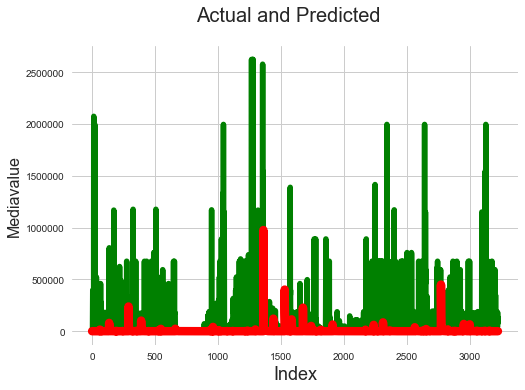

In [303]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,3222,1)]         # generating index 
fig = plt.figure()

plt.plot(c,merge["Predicted"], color="green",  linewidth=5.5, linestyle="-")#Predicted
plt.plot(c,merge["mediavalue"], color="red", linewidth=8.5, linestyle="-")#Actual
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Mediavalue', fontsize=16)                       # Y-label

In [304]:
np.sqrt(np.mean((merge['Predicted'] - merge['mediavalue'])**2))

228767.02280656123

In [305]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
#final=(0.2*final1+0.6*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": merge["poid"],
        "pred_mediavalue": merge['Predicted'],
        "media_value": merge['mediavalue']

    })
final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()
merge

,poid,Predicted,pfName,potName,bcName,choName,chotName,isbranded,pssid,posttime,...,unlikes,comments,shares,vv_per_follower,imp_per_follower,toteng_per_follower,ln_mediavalue,ln_videoviews,ln_impressions,ln_totalengagement
0,58838506,5861.511719,YouTube,Video,1080football (ytube),SPORF,Media,0,1,2020-01-07 15:51:58,...,0.0,5.0,0.0,0.00598,NaN,0.00031,-0.020444,5.365976,NaN,2.484907
1,66838615,7788.197266,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-23 16:55:55,...,14.0,342.0,0.0,0.97178,NaN,0.05533,-0.337416,9.249465,NaN,6.385194
2,62532294,19857.267578,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-02-14 16:38:37,...,0.0,4.0,0.0,0.09890,NaN,0.00413,NaN,6.577861,NaN,3.433987
3,66838616,960.922729,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-13 19:49:07,...,6.0,137.0,0.0,0.63750,NaN,0.02963,NaN,8.837246,NaN,5.771441
4,66213050,155579.093750,YouTube,Video,Adelaide Football Club (ytube),Adelaide Crows,Team,0,1,2020-03-21 05:27:35,...,0.0,1.0,0.0,0.12629,NaN,0.00218,6.536987,7.672292,NaN,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,62369839,39478.285156,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-01-30 10:51:05,...,1.0,17.0,0.0,0.02330,NaN,0.00145,5.144716,7.685703,NaN,4.912655
3217,63970876,183103.296875,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-02-27 21:47:02,...,5.0,70.0,0.0,0.26557,NaN,0.00925,5.086182,10.143134,NaN,6.786717
3218,62369841,132650.640625,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-01-23 14:59:15,...,3.0,32.0,0.0,0.05452,NaN,0.00446,4.629218,8.524963,NaN,6.023448
3219,63970878,76440.703125,YouTube,Video,yankees (ytube),Yankees,Team,0,1,2020-02-27 19:07:34,...,2.0,25.0,0.0,0.06054,NaN,0.00233,2.054980,8.664751,NaN,5.411646


In [306]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.1*final1+0.8*final2+0.1*final3)

finalvsl_submission = pd.DataFrame({
        "Id": merge["poid"],
        "pred_mediavalue": final,
        "media_value": merge['mediavalue']

    })
finalvsl_submission.to_csv("final_submission_vsl.csv", index=False)
finalvsl_submission.head()

,Id,pred_mediavalue,media_value
0,58838506,7.702782e+00,0.979764
1,66838615,inf,0.713612
2,62532294,2.570182e+136,0.000000
3,66838616,inf,0.000000
4,66213050,inf,690.203838


In [307]:
xt =x_test[:200]

pred1log = vote_mod.predict(xt)
pred2log = stack_mod.predict(xt)
pred3log = lasso_mod.predict(xt)
pred4log = xgmod.predict(xt)
pred5log = (0.2*pred1log+0.6*pred2log+0.2*pred3log)
pred1=np.exp(pred1log)-1
pred2=np.exp(pred2log)-1
pred3=np.exp(pred3log)-1
pred4=np.exp(pred4log)-1
pred5=np.exp(pred5log)-1

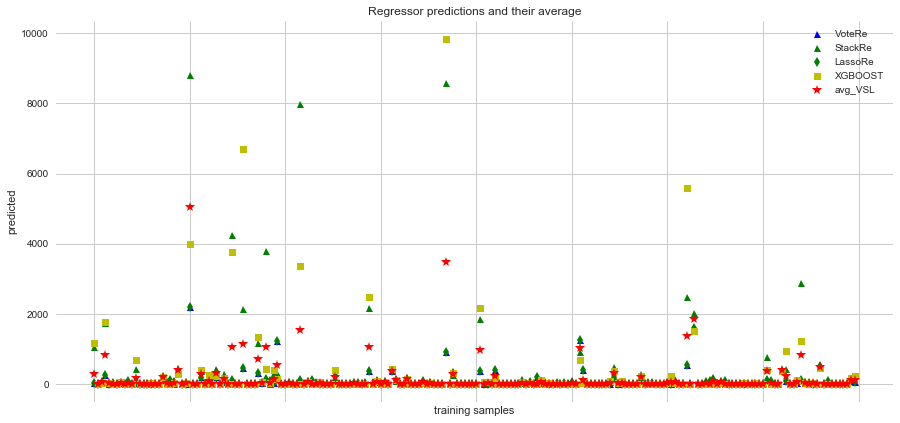

In [308]:
plt.figure(figsize=(15,7))
plt.plot(pred1, 'b^', label='VoteRe')
plt.plot(pred2, 'g^', label='StackRe')
plt.plot(pred3, 'gd', label='LassoRe')
plt.plot(pred4, 'ys', label='XGBOOST')
plt.plot(pred5, 'r*', ms=10, label='avg_VSL')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [309]:
from sklearn.ensemble import RandomForestRegressor # import the random forest model

In [310]:
# Step 1: Instantiate a random forest regressor
Model = RandomForestRegressor(n_estimators = 500,
                              random_state = 100, 
                              oob_score = True, 
                              max_features = None,
                              min_samples_leaf =37)

In [311]:
# Step 2: Train the forest
# Again fill in X and y below with x_train and ylog1p_train
Model.fit(X = x_train, y = y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=37, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=100, verbose=0,
                      warm_start=False)

In [312]:
# Step 3: Make predictions 
# Create predictions for the examples in x_train
y_pred_pet_rf= Model.predict(X = x_train)

In [313]:
# Check the training error
np.sqrt(np.mean((y_pred_pet_rf - y_train)**2))

2.1463570665869427

In [314]:
np.sqrt(np.mean((Model.oob_prediction_ - y_train)**2)) 

2.272108039655161

In [315]:
rf_pred=Model.predict(x_test)

print(f'Root Mean Square Error test = {score(rf_pred)}')

Root Mean Square Error test = 2.3002189715588632


In [316]:
rf_predlog=Model.predict(X_test)
rf_pred=(np.exp(rf_predlog))-1
final_submission_rf = pd.DataFrame({
        'poid': b['poid'],
        "Predicted": rf_pred
    })
#final_submission.to_csv("final_submission.csv", index=False)
#df = pd.concat((ref, s.rename('col')), axis=1)

In [317]:
merge_rf =  pd.merge(final_submission_rf,ref, on='poid')
merge_rf.head()

,poid,Predicted,pfName,potName,bcName,choName,chotName,isbranded,pssid,posttime,...,unlikes,comments,shares,vv_per_follower,imp_per_follower,toteng_per_follower,ln_mediavalue,ln_videoviews,ln_impressions,ln_totalengagement
0,58838506,4.933764,YouTube,Video,1080football (ytube),SPORF,Media,0,1,2020-01-07 15:51:58,...,0.0,5.0,0.0,0.00598,NaN,0.00031,-0.020444,5.365976,NaN,2.484907
1,66838615,7.996736,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-23 16:55:55,...,14.0,342.0,0.0,0.97178,NaN,0.05533,-0.337416,9.249465,NaN,6.385194
2,62532294,11.126377,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-02-14 16:38:37,...,0.0,4.0,0.0,0.09890,NaN,0.00413,NaN,6.577861,NaN,3.433987
3,66838616,7.996736,YouTube,Video,247sports (ytube),247Sports,Media,0,1,2020-03-13 19:49:07,...,6.0,137.0,0.0,0.63750,NaN,0.02963,NaN,8.837246,NaN,5.771441
4,66213050,11.126377,YouTube,Video,Adelaide Football Club (ytube),Adelaide Crows,Team,0,1,2020-03-21 05:27:35,...,0.0,1.0,0.0,0.12629,NaN,0.00218,6.536987,7.672292,NaN,3.637586


In [318]:
merge_rf.to_excel("final_submission_rf.xlsx", index=False)

In [319]:
"""from google.colab import files
files.download('final_submission_rf.xlsx') """

"from google.colab import files\nfiles.download('final_submission_rf.xlsx') "

Text(0, 0.5, 'Mediavalue')

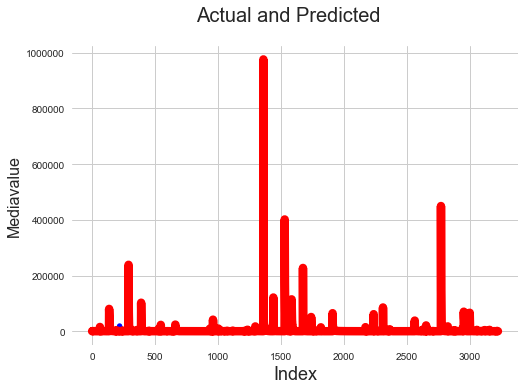

In [320]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,3222,1)]         # generating index 
fig = plt.figure()

plt.plot(c,merge_rf["Predicted"], color="blue",  linewidth=5.5, linestyle="-")#Predicted
plt.plot(c,merge_rf["mediavalue"], color="red", linewidth=8.5, linestyle="-")#Actual
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Mediavalue', fontsize=16)                       # Y-label

In [321]:
import lightgbm as lgb

In [322]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.002,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 10000,
    "n_estimators": 1000
}

In [323]:

lgbm = lgb.LGBMRegressor(**hyper_params)
lgbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[1]	valid_0's l1: 2.53012	valid_0's l2: 8.89798	valid_0's auc: 0.655216
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 2.52807	valid_0's l2: 8.88282	valid_0's auc: 0.657503
[3]	valid_0's l1: 2.526	valid_0's l2: 8.86765	valid_0's auc: 0.655329
[4]	valid_0's l1: 2.52394	valid_0's l2: 8.85259	valid_0's auc: 0.65487
[5]	valid_0's l1: 2.52194	valid_0's l2: 8.83796	valid_0's auc: 0.650851
[6]	valid_0's l1: 2.51992	valid_0's l2: 8.82321	valid_0's auc: 0.650582
[7]	valid_0's l1: 2.51787	valid_0's l2: 8.8083	valid_0's auc: 0.649972
[8]	valid_0's l1: 2.51586	valid_0's l2: 8.79367	valid_0's auc: 0.6497
[9]	valid_0's l1: 2.51386	valid_0's l2: 8.7791	valid_0's auc: 0.649813
[10]	valid_0's l1: 2.51189	valid_0's l2: 8.76475	valid_0's auc: 0.648926
[11]	valid_0's l1: 2.50983	valid_0's l2: 8.74997	valid_0's auc: 0.651393
[12]	valid_0's l1: 2.50778	valid_0's l2: 8.73538	valid_0's auc: 0.652431
[13]	valid_0's l1: 2.50577	valid_0's l2: 8.72097	valid_0's auc: 0.652691
[14]

[118]	valid_0's l1: 2.32581	valid_0's l2: 7.50585	valid_0's auc: 0.654243
[119]	valid_0's l1: 2.32435	valid_0's l2: 7.49668	valid_0's auc: 0.65423
[120]	valid_0's l1: 2.3228	valid_0's l2: 7.48675	valid_0's auc: 0.654342
[121]	valid_0's l1: 2.3212	valid_0's l2: 7.47669	valid_0's auc: 0.654489
[122]	valid_0's l1: 2.31964	valid_0's l2: 7.46684	valid_0's auc: 0.654535
[123]	valid_0's l1: 2.3181	valid_0's l2: 7.45723	valid_0's auc: 0.654564
[124]	valid_0's l1: 2.31655	valid_0's l2: 7.44747	valid_0's auc: 0.654571
[125]	valid_0's l1: 2.31502	valid_0's l2: 7.43782	valid_0's auc: 0.654605
[126]	valid_0's l1: 2.3135	valid_0's l2: 7.4282	valid_0's auc: 0.654607
[127]	valid_0's l1: 2.31197	valid_0's l2: 7.41864	valid_0's auc: 0.654578
[128]	valid_0's l1: 2.31043	valid_0's l2: 7.40905	valid_0's auc: 0.654594
[129]	valid_0's l1: 2.3089	valid_0's l2: 7.39951	valid_0's auc: 0.654612
[130]	valid_0's l1: 2.30738	valid_0's l2: 7.39009	valid_0's auc: 0.654717
[131]	valid_0's l1: 2.30588	valid_0's l2: 7.3

[230]	valid_0's l1: 2.18089	valid_0's l2: 6.64871	valid_0's auc: 0.656701
[231]	valid_0's l1: 2.18011	valid_0's l2: 6.64419	valid_0's auc: 0.656452
[232]	valid_0's l1: 2.17896	valid_0's l2: 6.63786	valid_0's auc: 0.656537
[233]	valid_0's l1: 2.1778	valid_0's l2: 6.63141	valid_0's auc: 0.656565
[234]	valid_0's l1: 2.17666	valid_0's l2: 6.62517	valid_0's auc: 0.656636
[235]	valid_0's l1: 2.1755	valid_0's l2: 6.61869	valid_0's auc: 0.656697
[236]	valid_0's l1: 2.17435	valid_0's l2: 6.61223	valid_0's auc: 0.65679
[237]	valid_0's l1: 2.17318	valid_0's l2: 6.60586	valid_0's auc: 0.656875
[238]	valid_0's l1: 2.17206	valid_0's l2: 6.59974	valid_0's auc: 0.656951
[239]	valid_0's l1: 2.1709	valid_0's l2: 6.59339	valid_0's auc: 0.657029
[240]	valid_0's l1: 2.16983	valid_0's l2: 6.5875	valid_0's auc: 0.657065
[241]	valid_0's l1: 2.16875	valid_0's l2: 6.58166	valid_0's auc: 0.65712
[242]	valid_0's l1: 2.1677	valid_0's l2: 6.57605	valid_0's auc: 0.657137
[243]	valid_0's l1: 2.16689	valid_0's l2: 6.5

[348]	valid_0's l1: 2.06558	valid_0's l2: 6.05988	valid_0's auc: 0.660603
[349]	valid_0's l1: 2.06478	valid_0's l2: 6.05612	valid_0's auc: 0.660594
[350]	valid_0's l1: 2.06399	valid_0's l2: 6.05237	valid_0's auc: 0.660605
[351]	valid_0's l1: 2.06311	valid_0's l2: 6.04831	valid_0's auc: 0.660662
[352]	valid_0's l1: 2.06227	valid_0's l2: 6.0443	valid_0's auc: 0.660699
[353]	valid_0's l1: 2.06145	valid_0's l2: 6.04044	valid_0's auc: 0.660707
[354]	valid_0's l1: 2.06064	valid_0's l2: 6.03673	valid_0's auc: 0.66072
[355]	valid_0's l1: 2.05981	valid_0's l2: 6.03287	valid_0's auc: 0.660732
[356]	valid_0's l1: 2.05895	valid_0's l2: 6.02888	valid_0's auc: 0.660759
[357]	valid_0's l1: 2.05814	valid_0's l2: 6.02519	valid_0's auc: 0.660778
[358]	valid_0's l1: 2.05732	valid_0's l2: 6.02136	valid_0's auc: 0.660774
[359]	valid_0's l1: 2.05651	valid_0's l2: 6.01761	valid_0's auc: 0.660791
[360]	valid_0's l1: 2.05569	valid_0's l2: 6.01386	valid_0's auc: 0.660813
[361]	valid_0's l1: 2.05489	valid_0's l2

[472]	valid_0's l1: 1.97539	valid_0's l2: 5.66148	valid_0's auc: 0.663115
[473]	valid_0's l1: 1.97473	valid_0's l2: 5.65872	valid_0's auc: 0.663164
[474]	valid_0's l1: 1.9741	valid_0's l2: 5.65617	valid_0's auc: 0.663185
[475]	valid_0's l1: 1.97344	valid_0's l2: 5.65344	valid_0's auc: 0.663228
[476]	valid_0's l1: 1.97282	valid_0's l2: 5.65091	valid_0's auc: 0.663278
[477]	valid_0's l1: 1.97222	valid_0's l2: 5.64866	valid_0's auc: 0.66329
[478]	valid_0's l1: 1.97157	valid_0's l2: 5.64603	valid_0's auc: 0.663352
[479]	valid_0's l1: 1.97097	valid_0's l2: 5.64379	valid_0's auc: 0.663346
[480]	valid_0's l1: 1.97035	valid_0's l2: 5.64136	valid_0's auc: 0.663384
[481]	valid_0's l1: 1.96971	valid_0's l2: 5.63864	valid_0's auc: 0.663407
[482]	valid_0's l1: 1.96904	valid_0's l2: 5.63585	valid_0's auc: 0.663479
[483]	valid_0's l1: 1.9684	valid_0's l2: 5.63322	valid_0's auc: 0.663508
[484]	valid_0's l1: 1.96779	valid_0's l2: 5.63064	valid_0's auc: 0.66352
[485]	valid_0's l1: 1.96716	valid_0's l2: 

[597]	valid_0's l1: 1.9081	valid_0's l2: 5.41004	valid_0's auc: 0.665162
[598]	valid_0's l1: 1.90769	valid_0's l2: 5.40869	valid_0's auc: 0.665171
[599]	valid_0's l1: 1.90725	valid_0's l2: 5.40721	valid_0's auc: 0.665179
[600]	valid_0's l1: 1.90683	valid_0's l2: 5.40578	valid_0's auc: 0.665194
[601]	valid_0's l1: 1.90654	valid_0's l2: 5.40483	valid_0's auc: 0.665129
[602]	valid_0's l1: 1.9061	valid_0's l2: 5.40315	valid_0's auc: 0.665145
[603]	valid_0's l1: 1.90561	valid_0's l2: 5.40125	valid_0's auc: 0.665191
[604]	valid_0's l1: 1.90514	valid_0's l2: 5.39935	valid_0's auc: 0.665241
[605]	valid_0's l1: 1.90472	valid_0's l2: 5.39788	valid_0's auc: 0.665254
[606]	valid_0's l1: 1.90429	valid_0's l2: 5.39643	valid_0's auc: 0.665269
[607]	valid_0's l1: 1.90385	valid_0's l2: 5.39479	valid_0's auc: 0.665295
[608]	valid_0's l1: 1.90344	valid_0's l2: 5.39334	valid_0's auc: 0.665301
[609]	valid_0's l1: 1.90301	valid_0's l2: 5.39192	valid_0's auc: 0.665297
[610]	valid_0's l1: 1.90273	valid_0's l2

[719]	valid_0's l1: 1.86052	valid_0's l2: 5.25346	valid_0's auc: 0.667332
[720]	valid_0's l1: 1.86015	valid_0's l2: 5.25236	valid_0's auc: 0.667342
[721]	valid_0's l1: 1.85979	valid_0's l2: 5.25124	valid_0's auc: 0.667366
[722]	valid_0's l1: 1.85944	valid_0's l2: 5.25018	valid_0's auc: 0.667384
[723]	valid_0's l1: 1.85908	valid_0's l2: 5.249	valid_0's auc: 0.667425
[724]	valid_0's l1: 1.85874	valid_0's l2: 5.24795	valid_0's auc: 0.667437
[725]	valid_0's l1: 1.85838	valid_0's l2: 5.24685	valid_0's auc: 0.667465
[726]	valid_0's l1: 1.85803	valid_0's l2: 5.24576	valid_0's auc: 0.66749
[727]	valid_0's l1: 1.85769	valid_0's l2: 5.24469	valid_0's auc: 0.667513
[728]	valid_0's l1: 1.85734	valid_0's l2: 5.24354	valid_0's auc: 0.667538
[729]	valid_0's l1: 1.85699	valid_0's l2: 5.24246	valid_0's auc: 0.667566
[730]	valid_0's l1: 1.85665	valid_0's l2: 5.24145	valid_0's auc: 0.667597
[731]	valid_0's l1: 1.85634	valid_0's l2: 5.24062	valid_0's auc: 0.667606
[732]	valid_0's l1: 1.85604	valid_0's l2:

[837]	valid_0's l1: 1.82481	valid_0's l2: 5.1474	valid_0's auc: 0.669198
[838]	valid_0's l1: 1.82453	valid_0's l2: 5.14641	valid_0's auc: 0.66923
[839]	valid_0's l1: 1.82428	valid_0's l2: 5.14574	valid_0's auc: 0.669251
[840]	valid_0's l1: 1.82398	valid_0's l2: 5.14472	valid_0's auc: 0.669286
[841]	valid_0's l1: 1.82372	valid_0's l2: 5.14404	valid_0's auc: 0.669305
[842]	valid_0's l1: 1.82345	valid_0's l2: 5.14334	valid_0's auc: 0.66933
[843]	valid_0's l1: 1.82317	valid_0's l2: 5.14261	valid_0's auc: 0.669362
[844]	valid_0's l1: 1.8229	valid_0's l2: 5.14189	valid_0's auc: 0.669404
[845]	valid_0's l1: 1.82267	valid_0's l2: 5.14135	valid_0's auc: 0.669411
[846]	valid_0's l1: 1.82251	valid_0's l2: 5.1409	valid_0's auc: 0.669379
[847]	valid_0's l1: 1.82228	valid_0's l2: 5.14032	valid_0's auc: 0.669395
[848]	valid_0's l1: 1.82203	valid_0's l2: 5.13971	valid_0's auc: 0.669407
[849]	valid_0's l1: 1.82179	valid_0's l2: 5.13911	valid_0's auc: 0.669423
[850]	valid_0's l1: 1.82155	valid_0's l2: 5

[960]	valid_0's l1: 1.79556	valid_0's l2: 5.06309	valid_0's auc: 0.67148
[961]	valid_0's l1: 1.79536	valid_0's l2: 5.06265	valid_0's auc: 0.67151
[962]	valid_0's l1: 1.79512	valid_0's l2: 5.06205	valid_0's auc: 0.671553
[963]	valid_0's l1: 1.79492	valid_0's l2: 5.06162	valid_0's auc: 0.671584
[964]	valid_0's l1: 1.79473	valid_0's l2: 5.06126	valid_0's auc: 0.671604
[965]	valid_0's l1: 1.79452	valid_0's l2: 5.06078	valid_0's auc: 0.671618
[966]	valid_0's l1: 1.79431	valid_0's l2: 5.06034	valid_0's auc: 0.671632
[967]	valid_0's l1: 1.79414	valid_0's l2: 5.06005	valid_0's auc: 0.671637
[968]	valid_0's l1: 1.79395	valid_0's l2: 5.05969	valid_0's auc: 0.671654
[969]	valid_0's l1: 1.79383	valid_0's l2: 5.05948	valid_0's auc: 0.671642
[970]	valid_0's l1: 1.79359	valid_0's l2: 5.05899	valid_0's auc: 0.671668
[971]	valid_0's l1: 1.79336	valid_0's l2: 5.05838	valid_0's auc: 0.671708
[972]	valid_0's l1: 1.79323	valid_0's l2: 5.05815	valid_0's auc: 0.671713
[973]	valid_0's l1: 1.793	valid_0's l2: 

[1074]	valid_0's l1: 1.77332	valid_0's l2: 5.01019	valid_0's auc: 0.673513
[1075]	valid_0's l1: 1.77312	valid_0's l2: 5.00975	valid_0's auc: 0.673543
[1076]	valid_0's l1: 1.77292	valid_0's l2: 5.00931	valid_0's auc: 0.67358
[1077]	valid_0's l1: 1.77277	valid_0's l2: 5.00896	valid_0's auc: 0.673581
[1078]	valid_0's l1: 1.77259	valid_0's l2: 5.00866	valid_0's auc: 0.673603
[1079]	valid_0's l1: 1.77236	valid_0's l2: 5.00802	valid_0's auc: 0.673642
[1080]	valid_0's l1: 1.77216	valid_0's l2: 5.0076	valid_0's auc: 0.673653
[1081]	valid_0's l1: 1.77202	valid_0's l2: 5.00724	valid_0's auc: 0.67368
[1082]	valid_0's l1: 1.77183	valid_0's l2: 5.00674	valid_0's auc: 0.673689
[1083]	valid_0's l1: 1.77169	valid_0's l2: 5.0064	valid_0's auc: 0.673706
[1084]	valid_0's l1: 1.77155	valid_0's l2: 5.00607	valid_0's auc: 0.673735
[1085]	valid_0's l1: 1.77141	valid_0's l2: 5.00574	valid_0's auc: 0.673761
[1086]	valid_0's l1: 1.77125	valid_0's l2: 5.00527	valid_0's auc: 0.673777
[1087]	valid_0's l1: 1.77116	

[1195]	valid_0's l1: 1.75475	valid_0's l2: 4.96452	valid_0's auc: 0.675567
[1196]	valid_0's l1: 1.75461	valid_0's l2: 4.96417	valid_0's auc: 0.675592
[1197]	valid_0's l1: 1.75448	valid_0's l2: 4.96395	valid_0's auc: 0.675593
[1198]	valid_0's l1: 1.75435	valid_0's l2: 4.96362	valid_0's auc: 0.675621
[1199]	valid_0's l1: 1.75422	valid_0's l2: 4.96341	valid_0's auc: 0.675632
[1200]	valid_0's l1: 1.75409	valid_0's l2: 4.96307	valid_0's auc: 0.675655
[1201]	valid_0's l1: 1.75396	valid_0's l2: 4.96285	valid_0's auc: 0.675664
[1202]	valid_0's l1: 1.7539	valid_0's l2: 4.9627	valid_0's auc: 0.675657
[1203]	valid_0's l1: 1.75373	valid_0's l2: 4.9623	valid_0's auc: 0.675678
[1204]	valid_0's l1: 1.75362	valid_0's l2: 4.96216	valid_0's auc: 0.675704
[1205]	valid_0's l1: 1.75352	valid_0's l2: 4.96199	valid_0's auc: 0.675717
[1206]	valid_0's l1: 1.7534	valid_0's l2: 4.96178	valid_0's auc: 0.675731
[1207]	valid_0's l1: 1.75329	valid_0's l2: 4.96161	valid_0's auc: 0.675742
[1208]	valid_0's l1: 1.75318	

[1307]	valid_0's l1: 1.74038	valid_0's l2: 4.93074	valid_0's auc: 0.677184
[1308]	valid_0's l1: 1.74027	valid_0's l2: 4.93043	valid_0's auc: 0.677178
[1309]	valid_0's l1: 1.74015	valid_0's l2: 4.93008	valid_0's auc: 0.677193
[1310]	valid_0's l1: 1.74003	valid_0's l2: 4.92973	valid_0's auc: 0.677202
[1311]	valid_0's l1: 1.73997	valid_0's l2: 4.92961	valid_0's auc: 0.677194
[1312]	valid_0's l1: 1.73989	valid_0's l2: 4.92939	valid_0's auc: 0.677188
[1313]	valid_0's l1: 1.73978	valid_0's l2: 4.92889	valid_0's auc: 0.677224
[1314]	valid_0's l1: 1.73969	valid_0's l2: 4.92859	valid_0's auc: 0.677224
[1315]	valid_0's l1: 1.73962	valid_0's l2: 4.92836	valid_0's auc: 0.677227
[1316]	valid_0's l1: 1.73951	valid_0's l2: 4.92788	valid_0's auc: 0.677251
[1317]	valid_0's l1: 1.7394	valid_0's l2: 4.92738	valid_0's auc: 0.67728
[1318]	valid_0's l1: 1.73934	valid_0's l2: 4.92718	valid_0's auc: 0.677275
[1319]	valid_0's l1: 1.73927	valid_0's l2: 4.92698	valid_0's auc: 0.677275
[1320]	valid_0's l1: 1.7391

[1443]	valid_0's l1: 1.72718	valid_0's l2: 4.89934	valid_0's auc: 0.679493
[1444]	valid_0's l1: 1.72709	valid_0's l2: 4.89917	valid_0's auc: 0.679526
[1445]	valid_0's l1: 1.727	valid_0's l2: 4.89901	valid_0's auc: 0.679533
[1446]	valid_0's l1: 1.7269	valid_0's l2: 4.89881	valid_0's auc: 0.67955
[1447]	valid_0's l1: 1.72681	valid_0's l2: 4.89865	valid_0's auc: 0.679569
[1448]	valid_0's l1: 1.72673	valid_0's l2: 4.89848	valid_0's auc: 0.679578
[1449]	valid_0's l1: 1.72662	valid_0's l2: 4.8983	valid_0's auc: 0.679603
[1450]	valid_0's l1: 1.72653	valid_0's l2: 4.89815	valid_0's auc: 0.679619
[1451]	valid_0's l1: 1.72646	valid_0's l2: 4.89809	valid_0's auc: 0.679623
[1452]	valid_0's l1: 1.72639	valid_0's l2: 4.89806	valid_0's auc: 0.679634
[1453]	valid_0's l1: 1.72633	valid_0's l2: 4.89802	valid_0's auc: 0.679642
[1454]	valid_0's l1: 1.72625	valid_0's l2: 4.89789	valid_0's auc: 0.679653
[1455]	valid_0's l1: 1.72618	valid_0's l2: 4.89787	valid_0's auc: 0.679657
[1456]	valid_0's l1: 1.72611	v

[1557]	valid_0's l1: 1.71688	valid_0's l2: 4.87449	valid_0's auc: 0.681728
[1558]	valid_0's l1: 1.71678	valid_0's l2: 4.87416	valid_0's auc: 0.681755
[1559]	valid_0's l1: 1.71673	valid_0's l2: 4.87407	valid_0's auc: 0.681762
[1560]	valid_0's l1: 1.71667	valid_0's l2: 4.87395	valid_0's auc: 0.681777
[1561]	valid_0's l1: 1.71664	valid_0's l2: 4.87391	valid_0's auc: 0.681769
[1562]	valid_0's l1: 1.71662	valid_0's l2: 4.87386	valid_0's auc: 0.681768
[1563]	valid_0's l1: 1.7166	valid_0's l2: 4.87382	valid_0's auc: 0.681771
[1564]	valid_0's l1: 1.71659	valid_0's l2: 4.87383	valid_0's auc: 0.681761
[1565]	valid_0's l1: 1.71659	valid_0's l2: 4.87385	valid_0's auc: 0.681746
[1566]	valid_0's l1: 1.71656	valid_0's l2: 4.8738	valid_0's auc: 0.681733
[1567]	valid_0's l1: 1.71654	valid_0's l2: 4.87376	valid_0's auc: 0.681732
[1568]	valid_0's l1: 1.71654	valid_0's l2: 4.87377	valid_0's auc: 0.681724
[1569]	valid_0's l1: 1.71652	valid_0's l2: 4.87373	valid_0's auc: 0.681726
[1570]	valid_0's l1: 1.7165

[1678]	valid_0's l1: 1.7095	valid_0's l2: 4.85656	valid_0's auc: 0.683011
[1679]	valid_0's l1: 1.70946	valid_0's l2: 4.8565	valid_0's auc: 0.683002
[1680]	valid_0's l1: 1.70944	valid_0's l2: 4.85644	valid_0's auc: 0.683014
[1681]	valid_0's l1: 1.70938	valid_0's l2: 4.8562	valid_0's auc: 0.683025
[1682]	valid_0's l1: 1.7093	valid_0's l2: 4.85601	valid_0's auc: 0.683044
[1683]	valid_0's l1: 1.70922	valid_0's l2: 4.85582	valid_0's auc: 0.683067
[1684]	valid_0's l1: 1.70914	valid_0's l2: 4.85561	valid_0's auc: 0.683086
[1685]	valid_0's l1: 1.70909	valid_0's l2: 4.85555	valid_0's auc: 0.683086
[1686]	valid_0's l1: 1.70901	valid_0's l2: 4.85537	valid_0's auc: 0.68311
[1687]	valid_0's l1: 1.70894	valid_0's l2: 4.85515	valid_0's auc: 0.683122
[1688]	valid_0's l1: 1.70886	valid_0's l2: 4.85496	valid_0's auc: 0.683139
[1689]	valid_0's l1: 1.70878	valid_0's l2: 4.85478	valid_0's auc: 0.683152
[1690]	valid_0's l1: 1.7087	valid_0's l2: 4.85452	valid_0's auc: 0.683164
[1691]	valid_0's l1: 1.70867	va

[1799]	valid_0's l1: 1.70523	valid_0's l2: 4.84768	valid_0's auc: 0.683457
[1800]	valid_0's l1: 1.70524	valid_0's l2: 4.84771	valid_0's auc: 0.68345
[1801]	valid_0's l1: 1.70522	valid_0's l2: 4.84775	valid_0's auc: 0.68344
[1802]	valid_0's l1: 1.7052	valid_0's l2: 4.84779	valid_0's auc: 0.683443
[1803]	valid_0's l1: 1.70518	valid_0's l2: 4.84782	valid_0's auc: 0.683446
[1804]	valid_0's l1: 1.70516	valid_0's l2: 4.84783	valid_0's auc: 0.68345
[1805]	valid_0's l1: 1.70512	valid_0's l2: 4.84775	valid_0's auc: 0.683458
[1806]	valid_0's l1: 1.7051	valid_0's l2: 4.84775	valid_0's auc: 0.68346
[1807]	valid_0's l1: 1.70507	valid_0's l2: 4.84778	valid_0's auc: 0.683462
[1808]	valid_0's l1: 1.70504	valid_0's l2: 4.84777	valid_0's auc: 0.683459
[1809]	valid_0's l1: 1.70499	valid_0's l2: 4.84776	valid_0's auc: 0.683477
[1810]	valid_0's l1: 1.70497	valid_0's l2: 4.84778	valid_0's auc: 0.683476
[1811]	valid_0's l1: 1.70496	valid_0's l2: 4.84778	valid_0's auc: 0.683477
[1812]	valid_0's l1: 1.70489	va

[1909]	valid_0's l1: 1.69935	valid_0's l2: 4.83357	valid_0's auc: 0.684699
[1910]	valid_0's l1: 1.69923	valid_0's l2: 4.83309	valid_0's auc: 0.684732
[1911]	valid_0's l1: 1.69919	valid_0's l2: 4.83307	valid_0's auc: 0.684743
[1912]	valid_0's l1: 1.69914	valid_0's l2: 4.83306	valid_0's auc: 0.684752
[1913]	valid_0's l1: 1.69909	valid_0's l2: 4.83304	valid_0's auc: 0.684753
[1914]	valid_0's l1: 1.69904	valid_0's l2: 4.83305	valid_0's auc: 0.684752
[1915]	valid_0's l1: 1.699	valid_0's l2: 4.83303	valid_0's auc: 0.684753
[1916]	valid_0's l1: 1.69895	valid_0's l2: 4.83303	valid_0's auc: 0.684756
[1917]	valid_0's l1: 1.69891	valid_0's l2: 4.83302	valid_0's auc: 0.684763
[1918]	valid_0's l1: 1.69885	valid_0's l2: 4.83295	valid_0's auc: 0.684785
[1919]	valid_0's l1: 1.69881	valid_0's l2: 4.83293	valid_0's auc: 0.684784
[1920]	valid_0's l1: 1.69877	valid_0's l2: 4.83293	valid_0's auc: 0.68479
[1921]	valid_0's l1: 1.69873	valid_0's l2: 4.83285	valid_0's auc: 0.68479
[1922]	valid_0's l1: 1.69869	

[2032]	valid_0's l1: 1.69574	valid_0's l2: 4.82669	valid_0's auc: 0.685249
[2033]	valid_0's l1: 1.69568	valid_0's l2: 4.82645	valid_0's auc: 0.685271
[2034]	valid_0's l1: 1.69567	valid_0's l2: 4.82646	valid_0's auc: 0.68527
[2035]	valid_0's l1: 1.69566	valid_0's l2: 4.82648	valid_0's auc: 0.685259
[2036]	valid_0's l1: 1.69565	valid_0's l2: 4.82649	valid_0's auc: 0.685257
[2037]	valid_0's l1: 1.69565	valid_0's l2: 4.82651	valid_0's auc: 0.685249
[2038]	valid_0's l1: 1.69557	valid_0's l2: 4.82612	valid_0's auc: 0.685273
[2039]	valid_0's l1: 1.6955	valid_0's l2: 4.82573	valid_0's auc: 0.685309
[2040]	valid_0's l1: 1.69549	valid_0's l2: 4.82575	valid_0's auc: 0.6853
[2041]	valid_0's l1: 1.6954	valid_0's l2: 4.8255	valid_0's auc: 0.68533
[2042]	valid_0's l1: 1.69535	valid_0's l2: 4.82545	valid_0's auc: 0.685344
[2043]	valid_0's l1: 1.6953	valid_0's l2: 4.82541	valid_0's auc: 0.685358
[2044]	valid_0's l1: 1.69526	valid_0's l2: 4.82532	valid_0's auc: 0.685377
[2045]	valid_0's l1: 1.69516	vali

[2148]	valid_0's l1: 1.69247	valid_0's l2: 4.81769	valid_0's auc: 0.686158
[2149]	valid_0's l1: 1.69249	valid_0's l2: 4.81778	valid_0's auc: 0.686157
[2150]	valid_0's l1: 1.69249	valid_0's l2: 4.81777	valid_0's auc: 0.686159
[2151]	valid_0's l1: 1.69246	valid_0's l2: 4.81772	valid_0's auc: 0.68617
[2152]	valid_0's l1: 1.69246	valid_0's l2: 4.81776	valid_0's auc: 0.68617
[2153]	valid_0's l1: 1.69243	valid_0's l2: 4.81761	valid_0's auc: 0.686179
[2154]	valid_0's l1: 1.69243	valid_0's l2: 4.81765	valid_0's auc: 0.686179
[2155]	valid_0's l1: 1.69244	valid_0's l2: 4.81769	valid_0's auc: 0.68618
[2156]	valid_0's l1: 1.69243	valid_0's l2: 4.81771	valid_0's auc: 0.686181
[2157]	valid_0's l1: 1.69244	valid_0's l2: 4.81775	valid_0's auc: 0.68618
[2158]	valid_0's l1: 1.69244	valid_0's l2: 4.81779	valid_0's auc: 0.686183
[2159]	valid_0's l1: 1.69244	valid_0's l2: 4.81783	valid_0's auc: 0.686189
[2160]	valid_0's l1: 1.69244	valid_0's l2: 4.81787	valid_0's auc: 0.686187
[2161]	valid_0's l1: 1.69238	

[2279]	valid_0's l1: 1.68848	valid_0's l2: 4.81001	valid_0's auc: 0.687274
[2280]	valid_0's l1: 1.68846	valid_0's l2: 4.81002	valid_0's auc: 0.687276
[2281]	valid_0's l1: 1.68845	valid_0's l2: 4.81	valid_0's auc: 0.687278
[2282]	valid_0's l1: 1.68845	valid_0's l2: 4.81	valid_0's auc: 0.687275
[2283]	valid_0's l1: 1.68844	valid_0's l2: 4.80986	valid_0's auc: 0.687273
[2284]	valid_0's l1: 1.68844	valid_0's l2: 4.80986	valid_0's auc: 0.687269
[2285]	valid_0's l1: 1.68845	valid_0's l2: 4.80985	valid_0's auc: 0.687268
[2286]	valid_0's l1: 1.68844	valid_0's l2: 4.80982	valid_0's auc: 0.687264
[2287]	valid_0's l1: 1.68844	valid_0's l2: 4.80984	valid_0's auc: 0.687258
[2288]	valid_0's l1: 1.68844	valid_0's l2: 4.80984	valid_0's auc: 0.68725
[2289]	valid_0's l1: 1.68844	valid_0's l2: 4.80981	valid_0's auc: 0.687254
[2290]	valid_0's l1: 1.68845	valid_0's l2: 4.80981	valid_0's auc: 0.687247
[2291]	valid_0's l1: 1.68838	valid_0's l2: 4.80951	valid_0's auc: 0.687277
[2292]	valid_0's l1: 1.68831	val

[2392]	valid_0's l1: 1.68516	valid_0's l2: 4.79896	valid_0's auc: 0.688429
[2393]	valid_0's l1: 1.68517	valid_0's l2: 4.79897	valid_0's auc: 0.688423
[2394]	valid_0's l1: 1.68517	valid_0's l2: 4.79898	valid_0's auc: 0.68842
[2395]	valid_0's l1: 1.68517	valid_0's l2: 4.799	valid_0's auc: 0.688419
[2396]	valid_0's l1: 1.68516	valid_0's l2: 4.79896	valid_0's auc: 0.688412
[2397]	valid_0's l1: 1.68518	valid_0's l2: 4.79897	valid_0's auc: 0.688403
[2398]	valid_0's l1: 1.68518	valid_0's l2: 4.79899	valid_0's auc: 0.688404
[2399]	valid_0's l1: 1.68519	valid_0's l2: 4.799	valid_0's auc: 0.688396
[2400]	valid_0's l1: 1.68519	valid_0's l2: 4.79904	valid_0's auc: 0.688394
[2401]	valid_0's l1: 1.68519	valid_0's l2: 4.79913	valid_0's auc: 0.688392
[2402]	valid_0's l1: 1.68519	valid_0's l2: 4.79921	valid_0's auc: 0.688386
[2403]	valid_0's l1: 1.68519	valid_0's l2: 4.7993	valid_0's auc: 0.68838
[2404]	valid_0's l1: 1.68519	valid_0's l2: 4.79939	valid_0's auc: 0.688372
[2405]	valid_0's l1: 1.68519	val

[2508]	valid_0's l1: 1.68302	valid_0's l2: 4.79204	valid_0's auc: 0.688982
[2509]	valid_0's l1: 1.68299	valid_0's l2: 4.79194	valid_0's auc: 0.688995
[2510]	valid_0's l1: 1.68297	valid_0's l2: 4.7919	valid_0's auc: 0.689
[2511]	valid_0's l1: 1.68294	valid_0's l2: 4.79182	valid_0's auc: 0.689014
[2512]	valid_0's l1: 1.68291	valid_0's l2: 4.79174	valid_0's auc: 0.689024
[2513]	valid_0's l1: 1.68288	valid_0's l2: 4.79165	valid_0's auc: 0.689044
[2514]	valid_0's l1: 1.68285	valid_0's l2: 4.79156	valid_0's auc: 0.689056
[2515]	valid_0's l1: 1.68282	valid_0's l2: 4.79149	valid_0's auc: 0.68907
[2516]	valid_0's l1: 1.68277	valid_0's l2: 4.79128	valid_0's auc: 0.689085
[2517]	valid_0's l1: 1.68272	valid_0's l2: 4.79108	valid_0's auc: 0.689102
[2518]	valid_0's l1: 1.68269	valid_0's l2: 4.791	valid_0's auc: 0.689111
[2519]	valid_0's l1: 1.68266	valid_0's l2: 4.79091	valid_0's auc: 0.689124
[2520]	valid_0's l1: 1.68263	valid_0's l2: 4.79083	valid_0's auc: 0.689141
[2521]	valid_0's l1: 1.68261	val

[2631]	valid_0's l1: 1.68153	valid_0's l2: 4.78947	valid_0's auc: 0.689074
[2632]	valid_0's l1: 1.6815	valid_0's l2: 4.7895	valid_0's auc: 0.689092
[2633]	valid_0's l1: 1.68149	valid_0's l2: 4.78958	valid_0's auc: 0.689094
[2634]	valid_0's l1: 1.68146	valid_0's l2: 4.78962	valid_0's auc: 0.689102
[2635]	valid_0's l1: 1.68146	valid_0's l2: 4.78974	valid_0's auc: 0.68911
[2636]	valid_0's l1: 1.68143	valid_0's l2: 4.78979	valid_0's auc: 0.689123
[2637]	valid_0's l1: 1.68141	valid_0's l2: 4.78983	valid_0's auc: 0.689132
[2638]	valid_0's l1: 1.68142	valid_0's l2: 4.78987	valid_0's auc: 0.689132
[2639]	valid_0's l1: 1.6814	valid_0's l2: 4.78995	valid_0's auc: 0.689137
[2640]	valid_0's l1: 1.68138	valid_0's l2: 4.79	valid_0's auc: 0.689153
[2641]	valid_0's l1: 1.68136	valid_0's l2: 4.78992	valid_0's auc: 0.689155
[2642]	valid_0's l1: 1.68134	valid_0's l2: 4.7898	valid_0's auc: 0.689158
[2643]	valid_0's l1: 1.68131	valid_0's l2: 4.78969	valid_0's auc: 0.689165
[2644]	valid_0's l1: 1.68129	vali

[2762]	valid_0's l1: 1.67947	valid_0's l2: 4.78507	valid_0's auc: 0.68983
[2763]	valid_0's l1: 1.67944	valid_0's l2: 4.78505	valid_0's auc: 0.689848
[2764]	valid_0's l1: 1.67943	valid_0's l2: 4.78508	valid_0's auc: 0.689853
[2765]	valid_0's l1: 1.67945	valid_0's l2: 4.78509	valid_0's auc: 0.689856
[2766]	valid_0's l1: 1.67944	valid_0's l2: 4.78509	valid_0's auc: 0.689858
[2767]	valid_0's l1: 1.67946	valid_0's l2: 4.7852	valid_0's auc: 0.689848
[2768]	valid_0's l1: 1.67944	valid_0's l2: 4.78518	valid_0's auc: 0.689867
[2769]	valid_0's l1: 1.67945	valid_0's l2: 4.7852	valid_0's auc: 0.689866
[2770]	valid_0's l1: 1.67943	valid_0's l2: 4.78519	valid_0's auc: 0.689877
[2771]	valid_0's l1: 1.67943	valid_0's l2: 4.78518	valid_0's auc: 0.689878
[2772]	valid_0's l1: 1.67942	valid_0's l2: 4.78516	valid_0's auc: 0.689875
[2773]	valid_0's l1: 1.67942	valid_0's l2: 4.78516	valid_0's auc: 0.689883
[2774]	valid_0's l1: 1.67943	valid_0's l2: 4.78519	valid_0's auc: 0.689882
[2775]	valid_0's l1: 1.67944

[2878]	valid_0's l1: 1.67831	valid_0's l2: 4.7817	valid_0's auc: 0.69041
[2879]	valid_0's l1: 1.67831	valid_0's l2: 4.78177	valid_0's auc: 0.690424
[2880]	valid_0's l1: 1.67831	valid_0's l2: 4.78184	valid_0's auc: 0.690431
[2881]	valid_0's l1: 1.67828	valid_0's l2: 4.78174	valid_0's auc: 0.690449
[2882]	valid_0's l1: 1.67824	valid_0's l2: 4.78166	valid_0's auc: 0.690454
[2883]	valid_0's l1: 1.67821	valid_0's l2: 4.78156	valid_0's auc: 0.690472
[2884]	valid_0's l1: 1.67822	valid_0's l2: 4.78158	valid_0's auc: 0.690464
[2885]	valid_0's l1: 1.67819	valid_0's l2: 4.78149	valid_0's auc: 0.69047
[2886]	valid_0's l1: 1.67819	valid_0's l2: 4.78157	valid_0's auc: 0.690469
[2887]	valid_0's l1: 1.67818	valid_0's l2: 4.78165	valid_0's auc: 0.69047
[2888]	valid_0's l1: 1.67815	valid_0's l2: 4.78157	valid_0's auc: 0.690469
[2889]	valid_0's l1: 1.67812	valid_0's l2: 4.7815	valid_0's auc: 0.690479
[2890]	valid_0's l1: 1.67809	valid_0's l2: 4.7814	valid_0's auc: 0.690488
[2891]	valid_0's l1: 1.67806	va

[3007]	valid_0's l1: 1.67709	valid_0's l2: 4.7805	valid_0's auc: 0.690694
[3008]	valid_0's l1: 1.67705	valid_0's l2: 4.78044	valid_0's auc: 0.690701
[3009]	valid_0's l1: 1.67702	valid_0's l2: 4.78037	valid_0's auc: 0.690716
[3010]	valid_0's l1: 1.67699	valid_0's l2: 4.78027	valid_0's auc: 0.690725
[3011]	valid_0's l1: 1.67699	valid_0's l2: 4.78021	valid_0's auc: 0.690728
[3012]	valid_0's l1: 1.67699	valid_0's l2: 4.78014	valid_0's auc: 0.690735
[3013]	valid_0's l1: 1.67699	valid_0's l2: 4.78023	valid_0's auc: 0.690734
[3014]	valid_0's l1: 1.67699	valid_0's l2: 4.78018	valid_0's auc: 0.690735
[3015]	valid_0's l1: 1.67699	valid_0's l2: 4.78015	valid_0's auc: 0.690734
[3016]	valid_0's l1: 1.67699	valid_0's l2: 4.78009	valid_0's auc: 0.690737
[3017]	valid_0's l1: 1.67699	valid_0's l2: 4.78002	valid_0's auc: 0.69074
[3018]	valid_0's l1: 1.67699	valid_0's l2: 4.77998	valid_0's auc: 0.690739
[3019]	valid_0's l1: 1.67699	valid_0's l2: 4.77995	valid_0's auc: 0.690743
[3020]	valid_0's l1: 1.677	

[3124]	valid_0's l1: 1.67633	valid_0's l2: 4.77671	valid_0's auc: 0.690949
[3125]	valid_0's l1: 1.67633	valid_0's l2: 4.77661	valid_0's auc: 0.690947
[3126]	valid_0's l1: 1.67633	valid_0's l2: 4.77657	valid_0's auc: 0.690949
[3127]	valid_0's l1: 1.67633	valid_0's l2: 4.77646	valid_0's auc: 0.690953
[3128]	valid_0's l1: 1.67631	valid_0's l2: 4.77641	valid_0's auc: 0.690959
[3129]	valid_0's l1: 1.6763	valid_0's l2: 4.77637	valid_0's auc: 0.690962
[3130]	valid_0's l1: 1.6763	valid_0's l2: 4.77626	valid_0's auc: 0.690962
[3131]	valid_0's l1: 1.6763	valid_0's l2: 4.77632	valid_0's auc: 0.690958
[3132]	valid_0's l1: 1.6763	valid_0's l2: 4.7763	valid_0's auc: 0.690966
[3133]	valid_0's l1: 1.67631	valid_0's l2: 4.77641	valid_0's auc: 0.69097
[3134]	valid_0's l1: 1.67631	valid_0's l2: 4.77639	valid_0's auc: 0.690968
[3135]	valid_0's l1: 1.6763	valid_0's l2: 4.77637	valid_0's auc: 0.69097
[3136]	valid_0's l1: 1.67631	valid_0's l2: 4.77641	valid_0's auc: 0.690972
[3137]	valid_0's l1: 1.67631	vali

[3234]	valid_0's l1: 1.67459	valid_0's l2: 4.77146	valid_0's auc: 0.691404
[3235]	valid_0's l1: 1.67456	valid_0's l2: 4.77129	valid_0's auc: 0.691411
[3236]	valid_0's l1: 1.67454	valid_0's l2: 4.77117	valid_0's auc: 0.691417
[3237]	valid_0's l1: 1.67452	valid_0's l2: 4.771	valid_0's auc: 0.691424
[3238]	valid_0's l1: 1.67449	valid_0's l2: 4.77081	valid_0's auc: 0.691432
[3239]	valid_0's l1: 1.67449	valid_0's l2: 4.77083	valid_0's auc: 0.691433
[3240]	valid_0's l1: 1.67447	valid_0's l2: 4.77066	valid_0's auc: 0.691445
[3241]	valid_0's l1: 1.67446	valid_0's l2: 4.77055	valid_0's auc: 0.691451
[3242]	valid_0's l1: 1.67445	valid_0's l2: 4.77045	valid_0's auc: 0.691459
[3243]	valid_0's l1: 1.67444	valid_0's l2: 4.77034	valid_0's auc: 0.691466
[3244]	valid_0's l1: 1.67443	valid_0's l2: 4.77024	valid_0's auc: 0.691476
[3245]	valid_0's l1: 1.67442	valid_0's l2: 4.77014	valid_0's auc: 0.69148
[3246]	valid_0's l1: 1.6744	valid_0's l2: 4.76999	valid_0's auc: 0.691489
[3247]	valid_0's l1: 1.67436	

[3465]	valid_0's l1: 1.67197	valid_0's l2: 4.76661	valid_0's auc: 0.692473
[3466]	valid_0's l1: 1.67195	valid_0's l2: 4.76656	valid_0's auc: 0.692481
[3467]	valid_0's l1: 1.67194	valid_0's l2: 4.76653	valid_0's auc: 0.692492
[3468]	valid_0's l1: 1.67193	valid_0's l2: 4.7665	valid_0's auc: 0.6925
[3469]	valid_0's l1: 1.67191	valid_0's l2: 4.76649	valid_0's auc: 0.692518
[3470]	valid_0's l1: 1.67189	valid_0's l2: 4.76645	valid_0's auc: 0.692527
[3471]	valid_0's l1: 1.67185	valid_0's l2: 4.76637	valid_0's auc: 0.692545
[3472]	valid_0's l1: 1.67181	valid_0's l2: 4.76632	valid_0's auc: 0.692558
[3473]	valid_0's l1: 1.67176	valid_0's l2: 4.76626	valid_0's auc: 0.692569
[3474]	valid_0's l1: 1.67172	valid_0's l2: 4.76621	valid_0's auc: 0.69258
[3475]	valid_0's l1: 1.67167	valid_0's l2: 4.76613	valid_0's auc: 0.692588
[3476]	valid_0's l1: 1.67168	valid_0's l2: 4.76613	valid_0's auc: 0.692594
[3477]	valid_0's l1: 1.67164	valid_0's l2: 4.76605	valid_0's auc: 0.692601
[3478]	valid_0's l1: 1.6716	v

[3598]	valid_0's l1: 1.67039	valid_0's l2: 4.7645	valid_0's auc: 0.692976
[3599]	valid_0's l1: 1.67039	valid_0's l2: 4.76459	valid_0's auc: 0.692972
[3600]	valid_0's l1: 1.67038	valid_0's l2: 4.76452	valid_0's auc: 0.692976
[3601]	valid_0's l1: 1.67037	valid_0's l2: 4.76452	valid_0's auc: 0.692962
[3602]	valid_0's l1: 1.67037	valid_0's l2: 4.76451	valid_0's auc: 0.692958
[3603]	valid_0's l1: 1.67037	valid_0's l2: 4.76456	valid_0's auc: 0.69294
[3604]	valid_0's l1: 1.67037	valid_0's l2: 4.76456	valid_0's auc: 0.692936
[3605]	valid_0's l1: 1.67034	valid_0's l2: 4.76448	valid_0's auc: 0.692933
[3606]	valid_0's l1: 1.67034	valid_0's l2: 4.76451	valid_0's auc: 0.692918
[3607]	valid_0's l1: 1.67034	valid_0's l2: 4.76452	valid_0's auc: 0.692915
[3608]	valid_0's l1: 1.67031	valid_0's l2: 4.76443	valid_0's auc: 0.692926
[3609]	valid_0's l1: 1.67031	valid_0's l2: 4.76447	valid_0's auc: 0.69291
[3610]	valid_0's l1: 1.67031	valid_0's l2: 4.76446	valid_0's auc: 0.692908
[3611]	valid_0's l1: 1.67031

[3712]	valid_0's l1: 1.66979	valid_0's l2: 4.76441	valid_0's auc: 0.693036
[3713]	valid_0's l1: 1.66978	valid_0's l2: 4.76443	valid_0's auc: 0.693042
[3714]	valid_0's l1: 1.66977	valid_0's l2: 4.76445	valid_0's auc: 0.693049
[3715]	valid_0's l1: 1.66978	valid_0's l2: 4.76456	valid_0's auc: 0.693048
[3716]	valid_0's l1: 1.66978	valid_0's l2: 4.76458	valid_0's auc: 0.693049
[3717]	valid_0's l1: 1.66978	valid_0's l2: 4.76466	valid_0's auc: 0.693046
[3718]	valid_0's l1: 1.66978	valid_0's l2: 4.76472	valid_0's auc: 0.693038
[3719]	valid_0's l1: 1.66978	valid_0's l2: 4.7648	valid_0's auc: 0.693042
[3720]	valid_0's l1: 1.66978	valid_0's l2: 4.76489	valid_0's auc: 0.693044
[3721]	valid_0's l1: 1.66977	valid_0's l2: 4.76484	valid_0's auc: 0.693046
[3722]	valid_0's l1: 1.66977	valid_0's l2: 4.76483	valid_0's auc: 0.693051
[3723]	valid_0's l1: 1.66977	valid_0's l2: 4.76488	valid_0's auc: 0.693049
[3724]	valid_0's l1: 1.66979	valid_0's l2: 4.76497	valid_0's auc: 0.693045
[3725]	valid_0's l1: 1.669

[3850]	valid_0's l1: 1.66794	valid_0's l2: 4.75904	valid_0's auc: 0.693964
[3851]	valid_0's l1: 1.66793	valid_0's l2: 4.75897	valid_0's auc: 0.693966
[3852]	valid_0's l1: 1.66793	valid_0's l2: 4.75895	valid_0's auc: 0.693979
[3853]	valid_0's l1: 1.66792	valid_0's l2: 4.75892	valid_0's auc: 0.693987
[3854]	valid_0's l1: 1.66791	valid_0's l2: 4.75892	valid_0's auc: 0.693995
[3855]	valid_0's l1: 1.6679	valid_0's l2: 4.75889	valid_0's auc: 0.694002
[3856]	valid_0's l1: 1.6679	valid_0's l2: 4.75889	valid_0's auc: 0.694003
[3857]	valid_0's l1: 1.66789	valid_0's l2: 4.75887	valid_0's auc: 0.694013
[3858]	valid_0's l1: 1.66788	valid_0's l2: 4.75887	valid_0's auc: 0.694014
[3859]	valid_0's l1: 1.66787	valid_0's l2: 4.75884	valid_0's auc: 0.694023
[3860]	valid_0's l1: 1.66787	valid_0's l2: 4.75884	valid_0's auc: 0.694035
[3861]	valid_0's l1: 1.66786	valid_0's l2: 4.75892	valid_0's auc: 0.694024
[3862]	valid_0's l1: 1.66786	valid_0's l2: 4.75894	valid_0's auc: 0.694019
[3863]	valid_0's l1: 1.6678

[3998]	valid_0's l1: 1.66735	valid_0's l2: 4.75762	valid_0's auc: 0.694327
[3999]	valid_0's l1: 1.66735	valid_0's l2: 4.75755	valid_0's auc: 0.694332
[4000]	valid_0's l1: 1.66734	valid_0's l2: 4.75752	valid_0's auc: 0.694335
[4001]	valid_0's l1: 1.66734	valid_0's l2: 4.75736	valid_0's auc: 0.694336
[4002]	valid_0's l1: 1.66735	valid_0's l2: 4.75727	valid_0's auc: 0.694337
[4003]	valid_0's l1: 1.66736	valid_0's l2: 4.75719	valid_0's auc: 0.694329
[4004]	valid_0's l1: 1.66735	valid_0's l2: 4.75702	valid_0's auc: 0.694322
[4005]	valid_0's l1: 1.66737	valid_0's l2: 4.75697	valid_0's auc: 0.694321
[4006]	valid_0's l1: 1.66737	valid_0's l2: 4.7568	valid_0's auc: 0.694321
[4007]	valid_0's l1: 1.66736	valid_0's l2: 4.75667	valid_0's auc: 0.694326
[4008]	valid_0's l1: 1.66737	valid_0's l2: 4.75658	valid_0's auc: 0.694323
[4009]	valid_0's l1: 1.66737	valid_0's l2: 4.75643	valid_0's auc: 0.694326
[4010]	valid_0's l1: 1.66737	valid_0's l2: 4.75626	valid_0's auc: 0.694332
[4011]	valid_0's l1: 1.667

[4232]	valid_0's l1: 1.6646	valid_0's l2: 4.74461	valid_0's auc: 0.695347
[4233]	valid_0's l1: 1.66456	valid_0's l2: 4.74446	valid_0's auc: 0.695359
[4234]	valid_0's l1: 1.66456	valid_0's l2: 4.74448	valid_0's auc: 0.695356
[4235]	valid_0's l1: 1.66453	valid_0's l2: 4.74435	valid_0's auc: 0.695367
[4236]	valid_0's l1: 1.66449	valid_0's l2: 4.74421	valid_0's auc: 0.69538
[4237]	valid_0's l1: 1.66446	valid_0's l2: 4.7441	valid_0's auc: 0.695395
[4238]	valid_0's l1: 1.66443	valid_0's l2: 4.74395	valid_0's auc: 0.695409
[4239]	valid_0's l1: 1.66439	valid_0's l2: 4.7438	valid_0's auc: 0.695421
[4240]	valid_0's l1: 1.66434	valid_0's l2: 4.74358	valid_0's auc: 0.695433
[4241]	valid_0's l1: 1.66434	valid_0's l2: 4.74359	valid_0's auc: 0.695436
[4242]	valid_0's l1: 1.66434	valid_0's l2: 4.74359	valid_0's auc: 0.695433
[4243]	valid_0's l1: 1.66435	valid_0's l2: 4.74361	valid_0's auc: 0.695428
[4244]	valid_0's l1: 1.66435	valid_0's l2: 4.74363	valid_0's auc: 0.695421
[4245]	valid_0's l1: 1.66435	

[4357]	valid_0's l1: 1.66409	valid_0's l2: 4.74557	valid_0's auc: 0.695453
[4358]	valid_0's l1: 1.66409	valid_0's l2: 4.7455	valid_0's auc: 0.695456
[4359]	valid_0's l1: 1.66408	valid_0's l2: 4.74547	valid_0's auc: 0.695456
[4360]	valid_0's l1: 1.66408	valid_0's l2: 4.74539	valid_0's auc: 0.695457
[4361]	valid_0's l1: 1.66405	valid_0's l2: 4.74534	valid_0's auc: 0.695461
[4362]	valid_0's l1: 1.66404	valid_0's l2: 4.74532	valid_0's auc: 0.695459
[4363]	valid_0's l1: 1.66402	valid_0's l2: 4.74526	valid_0's auc: 0.695457
[4364]	valid_0's l1: 1.664	valid_0's l2: 4.74519	valid_0's auc: 0.695461
[4365]	valid_0's l1: 1.66396	valid_0's l2: 4.74513	valid_0's auc: 0.695475
[4366]	valid_0's l1: 1.66396	valid_0's l2: 4.74518	valid_0's auc: 0.695467
[4367]	valid_0's l1: 1.66394	valid_0's l2: 4.74512	valid_0's auc: 0.695462
[4368]	valid_0's l1: 1.66392	valid_0's l2: 4.74505	valid_0's auc: 0.695463
[4369]	valid_0's l1: 1.66392	valid_0's l2: 4.74511	valid_0's auc: 0.695458
[4370]	valid_0's l1: 1.6639	

[4475]	valid_0's l1: 1.66341	valid_0's l2: 4.74165	valid_0's auc: 0.695701
[4476]	valid_0's l1: 1.66342	valid_0's l2: 4.74167	valid_0's auc: 0.695705
[4477]	valid_0's l1: 1.66341	valid_0's l2: 4.74162	valid_0's auc: 0.695703
[4478]	valid_0's l1: 1.66342	valid_0's l2: 4.74164	valid_0's auc: 0.695699
[4479]	valid_0's l1: 1.66341	valid_0's l2: 4.74158	valid_0's auc: 0.695702
[4480]	valid_0's l1: 1.66341	valid_0's l2: 4.74161	valid_0's auc: 0.695704
[4481]	valid_0's l1: 1.66341	valid_0's l2: 4.74156	valid_0's auc: 0.695695
[4482]	valid_0's l1: 1.6634	valid_0's l2: 4.74156	valid_0's auc: 0.695695
[4483]	valid_0's l1: 1.6634	valid_0's l2: 4.74157	valid_0's auc: 0.695691
[4484]	valid_0's l1: 1.66339	valid_0's l2: 4.74156	valid_0's auc: 0.6957
[4485]	valid_0's l1: 1.66339	valid_0's l2: 4.7416	valid_0's auc: 0.695698
[4486]	valid_0's l1: 1.66338	valid_0's l2: 4.74158	valid_0's auc: 0.695702
[4487]	valid_0's l1: 1.66337	valid_0's l2: 4.74158	valid_0's auc: 0.6957
[4488]	valid_0's l1: 1.66337	val

[4615]	valid_0's l1: 1.66282	valid_0's l2: 4.73999	valid_0's auc: 0.695936
[4616]	valid_0's l1: 1.66282	valid_0's l2: 4.74003	valid_0's auc: 0.695944
[4617]	valid_0's l1: 1.66282	valid_0's l2: 4.7401	valid_0's auc: 0.695949
[4618]	valid_0's l1: 1.66282	valid_0's l2: 4.74014	valid_0's auc: 0.695955
[4619]	valid_0's l1: 1.66282	valid_0's l2: 4.74021	valid_0's auc: 0.695963
[4620]	valid_0's l1: 1.66282	valid_0's l2: 4.74028	valid_0's auc: 0.695964
[4621]	valid_0's l1: 1.66282	valid_0's l2: 4.74021	valid_0's auc: 0.695961
[4622]	valid_0's l1: 1.66281	valid_0's l2: 4.74013	valid_0's auc: 0.695963
[4623]	valid_0's l1: 1.66282	valid_0's l2: 4.7402	valid_0's auc: 0.695961
[4624]	valid_0's l1: 1.66283	valid_0's l2: 4.74021	valid_0's auc: 0.69596
[4625]	valid_0's l1: 1.66284	valid_0's l2: 4.74029	valid_0's auc: 0.695957
[4626]	valid_0's l1: 1.66283	valid_0's l2: 4.74021	valid_0's auc: 0.695958
[4627]	valid_0's l1: 1.66282	valid_0's l2: 4.74013	valid_0's auc: 0.695963
[4628]	valid_0's l1: 1.6628	

[4730]	valid_0's l1: 1.66145	valid_0's l2: 4.73495	valid_0's auc: 0.696582
[4731]	valid_0's l1: 1.66145	valid_0's l2: 4.73498	valid_0's auc: 0.696584
[4732]	valid_0's l1: 1.66145	valid_0's l2: 4.73501	valid_0's auc: 0.696584
[4733]	valid_0's l1: 1.66145	valid_0's l2: 4.73503	valid_0's auc: 0.696579
[4734]	valid_0's l1: 1.66145	valid_0's l2: 4.73506	valid_0's auc: 0.69658
[4735]	valid_0's l1: 1.66146	valid_0's l2: 4.73516	valid_0's auc: 0.696579
[4736]	valid_0's l1: 1.66147	valid_0's l2: 4.73521	valid_0's auc: 0.696575
[4737]	valid_0's l1: 1.66147	valid_0's l2: 4.73525	valid_0's auc: 0.696577
[4738]	valid_0's l1: 1.66147	valid_0's l2: 4.73528	valid_0's auc: 0.696576
[4739]	valid_0's l1: 1.66147	valid_0's l2: 4.73532	valid_0's auc: 0.696585
[4740]	valid_0's l1: 1.66147	valid_0's l2: 4.73535	valid_0's auc: 0.696592
[4741]	valid_0's l1: 1.66147	valid_0's l2: 4.73545	valid_0's auc: 0.69658
[4742]	valid_0's l1: 1.66147	valid_0's l2: 4.73554	valid_0's auc: 0.696575
[4743]	valid_0's l1: 1.6614

[4865]	valid_0's l1: 1.66118	valid_0's l2: 4.73612	valid_0's auc: 0.696655
[4866]	valid_0's l1: 1.66115	valid_0's l2: 4.73601	valid_0's auc: 0.696672
[4867]	valid_0's l1: 1.66115	valid_0's l2: 4.73601	valid_0's auc: 0.696669
[4868]	valid_0's l1: 1.66114	valid_0's l2: 4.73601	valid_0's auc: 0.696663
[4869]	valid_0's l1: 1.66114	valid_0's l2: 4.73601	valid_0's auc: 0.696658
[4870]	valid_0's l1: 1.66111	valid_0's l2: 4.7359	valid_0's auc: 0.696661
[4871]	valid_0's l1: 1.66112	valid_0's l2: 4.73596	valid_0's auc: 0.696666
[4872]	valid_0's l1: 1.66109	valid_0's l2: 4.73596	valid_0's auc: 0.696667
[4873]	valid_0's l1: 1.66109	valid_0's l2: 4.73602	valid_0's auc: 0.696671
[4874]	valid_0's l1: 1.66107	valid_0's l2: 4.73602	valid_0's auc: 0.696669
[4875]	valid_0's l1: 1.66105	valid_0's l2: 4.73601	valid_0's auc: 0.696668
[4876]	valid_0's l1: 1.66102	valid_0's l2: 4.73601	valid_0's auc: 0.696663
[4877]	valid_0's l1: 1.66102	valid_0's l2: 4.73602	valid_0's auc: 0.696651
[4878]	valid_0's l1: 1.661

[4976]	valid_0's l1: 1.66059	valid_0's l2: 4.73436	valid_0's auc: 0.696975
[4977]	valid_0's l1: 1.6606	valid_0's l2: 4.73438	valid_0's auc: 0.696974
[4978]	valid_0's l1: 1.6606	valid_0's l2: 4.73439	valid_0's auc: 0.696971
[4979]	valid_0's l1: 1.6606	valid_0's l2: 4.7344	valid_0's auc: 0.69697
[4980]	valid_0's l1: 1.66061	valid_0's l2: 4.73444	valid_0's auc: 0.696964
[4981]	valid_0's l1: 1.66062	valid_0's l2: 4.73447	valid_0's auc: 0.696961
[4982]	valid_0's l1: 1.66064	valid_0's l2: 4.7345	valid_0's auc: 0.696949
[4983]	valid_0's l1: 1.66066	valid_0's l2: 4.73452	valid_0's auc: 0.696948
[4984]	valid_0's l1: 1.66067	valid_0's l2: 4.73453	valid_0's auc: 0.696946
[4985]	valid_0's l1: 1.66068	valid_0's l2: 4.73453	valid_0's auc: 0.696944
[4986]	valid_0's l1: 1.6607	valid_0's l2: 4.73456	valid_0's auc: 0.69695
[4987]	valid_0's l1: 1.66071	valid_0's l2: 4.7346	valid_0's auc: 0.69695
[4988]	valid_0's l1: 1.66073	valid_0's l2: 4.73463	valid_0's auc: 0.696946
[4989]	valid_0's l1: 1.66074	valid_

[5116]	valid_0's l1: 1.66058	valid_0's l2: 4.736	valid_0's auc: 0.696978
[5117]	valid_0's l1: 1.66057	valid_0's l2: 4.73599	valid_0's auc: 0.696978
[5118]	valid_0's l1: 1.66057	valid_0's l2: 4.73599	valid_0's auc: 0.696978
[5119]	valid_0's l1: 1.66055	valid_0's l2: 4.73602	valid_0's auc: 0.696978
[5120]	valid_0's l1: 1.66055	valid_0's l2: 4.73603	valid_0's auc: 0.696976
[5121]	valid_0's l1: 1.66056	valid_0's l2: 4.73614	valid_0's auc: 0.69698
[5122]	valid_0's l1: 1.66056	valid_0's l2: 4.73616	valid_0's auc: 0.696988
[5123]	valid_0's l1: 1.66057	valid_0's l2: 4.73624	valid_0's auc: 0.696987
[5124]	valid_0's l1: 1.66057	valid_0's l2: 4.7362	valid_0's auc: 0.696994
[5125]	valid_0's l1: 1.66059	valid_0's l2: 4.73628	valid_0's auc: 0.696998
[5126]	valid_0's l1: 1.6606	valid_0's l2: 4.73639	valid_0's auc: 0.696997
[5127]	valid_0's l1: 1.66061	valid_0's l2: 4.7365	valid_0's auc: 0.696997
[5128]	valid_0's l1: 1.66062	valid_0's l2: 4.73661	valid_0's auc: 0.696999
[5129]	valid_0's l1: 1.66063	va

[5262]	valid_0's l1: 1.65986	valid_0's l2: 4.73525	valid_0's auc: 0.697278
[5263]	valid_0's l1: 1.65986	valid_0's l2: 4.73521	valid_0's auc: 0.697279
[5264]	valid_0's l1: 1.65986	valid_0's l2: 4.73517	valid_0's auc: 0.697284
[5265]	valid_0's l1: 1.65985	valid_0's l2: 4.73514	valid_0's auc: 0.697288
[5266]	valid_0's l1: 1.65986	valid_0's l2: 4.73511	valid_0's auc: 0.697295
[5267]	valid_0's l1: 1.65985	valid_0's l2: 4.73508	valid_0's auc: 0.697299
[5268]	valid_0's l1: 1.65985	valid_0's l2: 4.73503	valid_0's auc: 0.697297
[5269]	valid_0's l1: 1.65984	valid_0's l2: 4.73499	valid_0's auc: 0.6973
[5270]	valid_0's l1: 1.65984	valid_0's l2: 4.73496	valid_0's auc: 0.697305
[5271]	valid_0's l1: 1.65985	valid_0's l2: 4.73499	valid_0's auc: 0.697302
[5272]	valid_0's l1: 1.65987	valid_0's l2: 4.73509	valid_0's auc: 0.697286
[5273]	valid_0's l1: 1.65987	valid_0's l2: 4.7351	valid_0's auc: 0.697282
[5274]	valid_0's l1: 1.65987	valid_0's l2: 4.73512	valid_0's auc: 0.697284
[5275]	valid_0's l1: 1.65987

[5374]	valid_0's l1: 1.65898	valid_0's l2: 4.7317	valid_0's auc: 0.697785
[5375]	valid_0's l1: 1.65896	valid_0's l2: 4.7317	valid_0's auc: 0.697787
[5376]	valid_0's l1: 1.65894	valid_0's l2: 4.7317	valid_0's auc: 0.6978
[5377]	valid_0's l1: 1.65892	valid_0's l2: 4.73168	valid_0's auc: 0.697805
[5378]	valid_0's l1: 1.65891	valid_0's l2: 4.73168	valid_0's auc: 0.697815
[5379]	valid_0's l1: 1.65888	valid_0's l2: 4.73167	valid_0's auc: 0.697829
[5380]	valid_0's l1: 1.65886	valid_0's l2: 4.73165	valid_0's auc: 0.697841
[5381]	valid_0's l1: 1.65887	valid_0's l2: 4.73176	valid_0's auc: 0.697832
[5382]	valid_0's l1: 1.65889	valid_0's l2: 4.73184	valid_0's auc: 0.697827
[5383]	valid_0's l1: 1.6589	valid_0's l2: 4.73194	valid_0's auc: 0.697815
[5384]	valid_0's l1: 1.6589	valid_0's l2: 4.73204	valid_0's auc: 0.697809
[5385]	valid_0's l1: 1.65892	valid_0's l2: 4.7322	valid_0's auc: 0.697808
[5386]	valid_0's l1: 1.65892	valid_0's l2: 4.73226	valid_0's auc: 0.697807
[5387]	valid_0's l1: 1.65893	vali

[5508]	valid_0's l1: 1.65864	valid_0's l2: 4.73197	valid_0's auc: 0.697902
[5509]	valid_0's l1: 1.65864	valid_0's l2: 4.73191	valid_0's auc: 0.697898
[5510]	valid_0's l1: 1.65864	valid_0's l2: 4.7319	valid_0's auc: 0.697895
[5511]	valid_0's l1: 1.65861	valid_0's l2: 4.73184	valid_0's auc: 0.697891
[5512]	valid_0's l1: 1.65861	valid_0's l2: 4.73187	valid_0's auc: 0.697885
[5513]	valid_0's l1: 1.6586	valid_0's l2: 4.73186	valid_0's auc: 0.697882
[5514]	valid_0's l1: 1.6586	valid_0's l2: 4.7319	valid_0's auc: 0.697876
[5515]	valid_0's l1: 1.65856	valid_0's l2: 4.73184	valid_0's auc: 0.697878
[5516]	valid_0's l1: 1.65856	valid_0's l2: 4.73186	valid_0's auc: 0.69787
[5517]	valid_0's l1: 1.65855	valid_0's l2: 4.73184	valid_0's auc: 0.697869
[5518]	valid_0's l1: 1.65855	valid_0's l2: 4.73187	valid_0's auc: 0.69787
[5519]	valid_0's l1: 1.65851	valid_0's l2: 4.73181	valid_0's auc: 0.697862
[5520]	valid_0's l1: 1.6585	valid_0's l2: 4.73179	valid_0's auc: 0.697864
[5521]	valid_0's l1: 1.6585	vali

[5644]	valid_0's l1: 1.65792	valid_0's l2: 4.73054	valid_0's auc: 0.698138
[5645]	valid_0's l1: 1.65792	valid_0's l2: 4.73053	valid_0's auc: 0.698145
[5646]	valid_0's l1: 1.65789	valid_0's l2: 4.73037	valid_0's auc: 0.698147
[5647]	valid_0's l1: 1.65789	valid_0's l2: 4.73036	valid_0's auc: 0.698152
[5648]	valid_0's l1: 1.65786	valid_0's l2: 4.73018	valid_0's auc: 0.698155
[5649]	valid_0's l1: 1.65782	valid_0's l2: 4.73003	valid_0's auc: 0.698163
[5650]	valid_0's l1: 1.65779	valid_0's l2: 4.72985	valid_0's auc: 0.698171
[5651]	valid_0's l1: 1.6578	valid_0's l2: 4.72984	valid_0's auc: 0.698179
[5652]	valid_0's l1: 1.65781	valid_0's l2: 4.72983	valid_0's auc: 0.69818
[5653]	valid_0's l1: 1.65782	valid_0's l2: 4.72982	valid_0's auc: 0.698183
[5654]	valid_0's l1: 1.65782	valid_0's l2: 4.72982	valid_0's auc: 0.698191
[5655]	valid_0's l1: 1.65783	valid_0's l2: 4.72981	valid_0's auc: 0.698196
[5656]	valid_0's l1: 1.65782	valid_0's l2: 4.72974	valid_0's auc: 0.698199
[5657]	valid_0's l1: 1.6578

[5761]	valid_0's l1: 1.65743	valid_0's l2: 4.72838	valid_0's auc: 0.698457
[5762]	valid_0's l1: 1.65743	valid_0's l2: 4.72841	valid_0's auc: 0.698461
[5763]	valid_0's l1: 1.65743	valid_0's l2: 4.72841	valid_0's auc: 0.698458
[5764]	valid_0's l1: 1.65744	valid_0's l2: 4.72844	valid_0's auc: 0.698452
[5765]	valid_0's l1: 1.65744	valid_0's l2: 4.72848	valid_0's auc: 0.698448
[5766]	valid_0's l1: 1.65745	valid_0's l2: 4.72854	valid_0's auc: 0.698449
[5767]	valid_0's l1: 1.65745	valid_0's l2: 4.72858	valid_0's auc: 0.698451
[5768]	valid_0's l1: 1.65745	valid_0's l2: 4.72861	valid_0's auc: 0.698452
[5769]	valid_0's l1: 1.65745	valid_0's l2: 4.72864	valid_0's auc: 0.698453
[5770]	valid_0's l1: 1.65745	valid_0's l2: 4.72867	valid_0's auc: 0.698456
[5771]	valid_0's l1: 1.65743	valid_0's l2: 4.72857	valid_0's auc: 0.698474
[5772]	valid_0's l1: 1.6574	valid_0's l2: 4.72847	valid_0's auc: 0.698493
[5773]	valid_0's l1: 1.65738	valid_0's l2: 4.72836	valid_0's auc: 0.698508
[5774]	valid_0's l1: 1.657

[5889]	valid_0's l1: 1.657	valid_0's l2: 4.72861	valid_0's auc: 0.698897
[5890]	valid_0's l1: 1.65698	valid_0's l2: 4.72853	valid_0's auc: 0.698914
[5891]	valid_0's l1: 1.657	valid_0's l2: 4.72855	valid_0's auc: 0.698904
[5892]	valid_0's l1: 1.65701	valid_0's l2: 4.72857	valid_0's auc: 0.698905
[5893]	valid_0's l1: 1.65703	valid_0's l2: 4.72859	valid_0's auc: 0.698901
[5894]	valid_0's l1: 1.65704	valid_0's l2: 4.72862	valid_0's auc: 0.698897
[5895]	valid_0's l1: 1.65705	valid_0's l2: 4.72867	valid_0's auc: 0.698887
[5896]	valid_0's l1: 1.65706	valid_0's l2: 4.72869	valid_0's auc: 0.698881
[5897]	valid_0's l1: 1.65707	valid_0's l2: 4.72874	valid_0's auc: 0.69888
[5898]	valid_0's l1: 1.65707	valid_0's l2: 4.72878	valid_0's auc: 0.698879
[5899]	valid_0's l1: 1.65709	valid_0's l2: 4.7288	valid_0's auc: 0.698874
[5900]	valid_0's l1: 1.6571	valid_0's l2: 4.72883	valid_0's auc: 0.698869
[5901]	valid_0's l1: 1.6571	valid_0's l2: 4.72884	valid_0's auc: 0.698864
[5902]	valid_0's l1: 1.6571	valid

[6011]	valid_0's l1: 1.65686	valid_0's l2: 4.72885	valid_0's auc: 0.698992
[6012]	valid_0's l1: 1.65686	valid_0's l2: 4.72888	valid_0's auc: 0.698997
[6013]	valid_0's l1: 1.65687	valid_0's l2: 4.72887	valid_0's auc: 0.699001
[6014]	valid_0's l1: 1.65687	valid_0's l2: 4.7289	valid_0's auc: 0.698997
[6015]	valid_0's l1: 1.65687	valid_0's l2: 4.72894	valid_0's auc: 0.698998
[6016]	valid_0's l1: 1.65687	valid_0's l2: 4.72898	valid_0's auc: 0.698995
[6017]	valid_0's l1: 1.65687	valid_0's l2: 4.729	valid_0's auc: 0.698995
[6018]	valid_0's l1: 1.65688	valid_0's l2: 4.72903	valid_0's auc: 0.698998
[6019]	valid_0's l1: 1.65688	valid_0's l2: 4.72907	valid_0's auc: 0.699001
[6020]	valid_0's l1: 1.65689	valid_0's l2: 4.72906	valid_0's auc: 0.699
[6021]	valid_0's l1: 1.65684	valid_0's l2: 4.72897	valid_0's auc: 0.699006
[6022]	valid_0's l1: 1.65683	valid_0's l2: 4.729	valid_0's auc: 0.699003
[6023]	valid_0's l1: 1.65678	valid_0's l2: 4.72892	valid_0's auc: 0.699013
[6024]	valid_0's l1: 1.65676	vali

[6140]	valid_0's l1: 1.65622	valid_0's l2: 4.72884	valid_0's auc: 0.699005
[6141]	valid_0's l1: 1.65622	valid_0's l2: 4.72887	valid_0's auc: 0.69901
[6142]	valid_0's l1: 1.65622	valid_0's l2: 4.7289	valid_0's auc: 0.699018
[6143]	valid_0's l1: 1.65623	valid_0's l2: 4.72891	valid_0's auc: 0.69902
[6144]	valid_0's l1: 1.65624	valid_0's l2: 4.72887	valid_0's auc: 0.699023
[6145]	valid_0's l1: 1.65625	valid_0's l2: 4.72889	valid_0's auc: 0.699018
[6146]	valid_0's l1: 1.65625	valid_0's l2: 4.72887	valid_0's auc: 0.699028
[6147]	valid_0's l1: 1.65626	valid_0's l2: 4.72888	valid_0's auc: 0.699023
[6148]	valid_0's l1: 1.65627	valid_0's l2: 4.72891	valid_0's auc: 0.69903
[6149]	valid_0's l1: 1.65627	valid_0's l2: 4.72889	valid_0's auc: 0.699035
[6150]	valid_0's l1: 1.65627	valid_0's l2: 4.7289	valid_0's auc: 0.699034
[6151]	valid_0's l1: 1.65627	valid_0's l2: 4.7289	valid_0's auc: 0.699035
[6152]	valid_0's l1: 1.65626	valid_0's l2: 4.7289	valid_0's auc: 0.699038
[6153]	valid_0's l1: 1.65625	val

[6274]	valid_0's l1: 1.65557	valid_0's l2: 4.72707	valid_0's auc: 0.699257
[6275]	valid_0's l1: 1.65552	valid_0's l2: 4.72687	valid_0's auc: 0.69928
[6276]	valid_0's l1: 1.65547	valid_0's l2: 4.72666	valid_0's auc: 0.699299
[6277]	valid_0's l1: 1.65544	valid_0's l2: 4.72651	valid_0's auc: 0.699315
[6278]	valid_0's l1: 1.65541	valid_0's l2: 4.72639	valid_0's auc: 0.699324
[6279]	valid_0's l1: 1.65536	valid_0's l2: 4.72619	valid_0's auc: 0.699345
[6280]	valid_0's l1: 1.65531	valid_0's l2: 4.72599	valid_0's auc: 0.699365
[6281]	valid_0's l1: 1.6553	valid_0's l2: 4.72596	valid_0's auc: 0.699367
[6282]	valid_0's l1: 1.6553	valid_0's l2: 4.72596	valid_0's auc: 0.699376
[6283]	valid_0's l1: 1.6553	valid_0's l2: 4.72595	valid_0's auc: 0.699392
[6284]	valid_0's l1: 1.6553	valid_0's l2: 4.72596	valid_0's auc: 0.699399
[6285]	valid_0's l1: 1.6553	valid_0's l2: 4.72597	valid_0's auc: 0.699406
[6286]	valid_0's l1: 1.6553	valid_0's l2: 4.72597	valid_0's auc: 0.699409
[6287]	valid_0's l1: 1.6553	vali

[6402]	valid_0's l1: 1.65432	valid_0's l2: 4.72226	valid_0's auc: 0.699875
[6403]	valid_0's l1: 1.65432	valid_0's l2: 4.72221	valid_0's auc: 0.699882
[6404]	valid_0's l1: 1.65432	valid_0's l2: 4.72223	valid_0's auc: 0.699889
[6405]	valid_0's l1: 1.65432	valid_0's l2: 4.72228	valid_0's auc: 0.699889
[6406]	valid_0's l1: 1.65432	valid_0's l2: 4.7223	valid_0's auc: 0.699891
[6407]	valid_0's l1: 1.65432	valid_0's l2: 4.72225	valid_0's auc: 0.699898
[6408]	valid_0's l1: 1.65432	valid_0's l2: 4.72228	valid_0's auc: 0.699902
[6409]	valid_0's l1: 1.65431	valid_0's l2: 4.72224	valid_0's auc: 0.699907
[6410]	valid_0's l1: 1.65432	valid_0's l2: 4.72228	valid_0's auc: 0.699914
[6411]	valid_0's l1: 1.65432	valid_0's l2: 4.72236	valid_0's auc: 0.699908
[6412]	valid_0's l1: 1.65432	valid_0's l2: 4.72235	valid_0's auc: 0.699913
[6413]	valid_0's l1: 1.6543	valid_0's l2: 4.72231	valid_0's auc: 0.699909
[6414]	valid_0's l1: 1.65431	valid_0's l2: 4.72239	valid_0's auc: 0.69991
[6415]	valid_0's l1: 1.65429

[6540]	valid_0's l1: 1.6535	valid_0's l2: 4.72119	valid_0's auc: 0.699967
[6541]	valid_0's l1: 1.6535	valid_0's l2: 4.72122	valid_0's auc: 0.699988
[6542]	valid_0's l1: 1.6535	valid_0's l2: 4.72125	valid_0's auc: 0.699999
[6543]	valid_0's l1: 1.6535	valid_0's l2: 4.72128	valid_0's auc: 0.700009
[6544]	valid_0's l1: 1.65351	valid_0's l2: 4.72131	valid_0's auc: 0.700018
[6545]	valid_0's l1: 1.65351	valid_0's l2: 4.72131	valid_0's auc: 0.700036
[6546]	valid_0's l1: 1.65351	valid_0's l2: 4.72132	valid_0's auc: 0.70005
[6547]	valid_0's l1: 1.6535	valid_0's l2: 4.72128	valid_0's auc: 0.700068
[6548]	valid_0's l1: 1.65349	valid_0's l2: 4.72128	valid_0's auc: 0.700084
[6549]	valid_0's l1: 1.65349	valid_0's l2: 4.72128	valid_0's auc: 0.700098
[6550]	valid_0's l1: 1.65349	valid_0's l2: 4.72131	valid_0's auc: 0.700107
[6551]	valid_0's l1: 1.65349	valid_0's l2: 4.72137	valid_0's auc: 0.70009
[6552]	valid_0's l1: 1.65349	valid_0's l2: 4.72142	valid_0's auc: 0.700082
[6553]	valid_0's l1: 1.65348	val

[6664]	valid_0's l1: 1.65366	valid_0's l2: 4.72449	valid_0's auc: 0.700082
[6665]	valid_0's l1: 1.65367	valid_0's l2: 4.72447	valid_0's auc: 0.700081
[6666]	valid_0's l1: 1.65368	valid_0's l2: 4.72444	valid_0's auc: 0.700081
[6667]	valid_0's l1: 1.65368	valid_0's l2: 4.72443	valid_0's auc: 0.700083
[6668]	valid_0's l1: 1.65369	valid_0's l2: 4.72441	valid_0's auc: 0.700083
[6669]	valid_0's l1: 1.6537	valid_0's l2: 4.72439	valid_0's auc: 0.700084
[6670]	valid_0's l1: 1.65371	valid_0's l2: 4.72437	valid_0's auc: 0.700082
[6671]	valid_0's l1: 1.65372	valid_0's l2: 4.72443	valid_0's auc: 0.700084
[6672]	valid_0's l1: 1.6537	valid_0's l2: 4.72439	valid_0's auc: 0.700085
[6673]	valid_0's l1: 1.65367	valid_0's l2: 4.72427	valid_0's auc: 0.700097
[6674]	valid_0's l1: 1.65366	valid_0's l2: 4.72423	valid_0's auc: 0.700105
[6675]	valid_0's l1: 1.65363	valid_0's l2: 4.72411	valid_0's auc: 0.700118
[6676]	valid_0's l1: 1.65358	valid_0's l2: 4.72395	valid_0's auc: 0.700135
[6677]	valid_0's l1: 1.6535

[6786]	valid_0's l1: 1.65301	valid_0's l2: 4.7211	valid_0's auc: 0.700368
[6787]	valid_0's l1: 1.65299	valid_0's l2: 4.72095	valid_0's auc: 0.700377
[6788]	valid_0's l1: 1.65298	valid_0's l2: 4.72092	valid_0's auc: 0.700379
[6789]	valid_0's l1: 1.65297	valid_0's l2: 4.72094	valid_0's auc: 0.70039
[6790]	valid_0's l1: 1.65296	valid_0's l2: 4.7209	valid_0's auc: 0.700394
[6791]	valid_0's l1: 1.65295	valid_0's l2: 4.72082	valid_0's auc: 0.700398
[6792]	valid_0's l1: 1.65295	valid_0's l2: 4.72076	valid_0's auc: 0.700401
[6793]	valid_0's l1: 1.65293	valid_0's l2: 4.72068	valid_0's auc: 0.700409
[6794]	valid_0's l1: 1.65293	valid_0's l2: 4.72061	valid_0's auc: 0.700413
[6795]	valid_0's l1: 1.65292	valid_0's l2: 4.7205	valid_0's auc: 0.700412
[6796]	valid_0's l1: 1.65292	valid_0's l2: 4.7204	valid_0's auc: 0.700415
[6797]	valid_0's l1: 1.65293	valid_0's l2: 4.72034	valid_0's auc: 0.700416
[6798]	valid_0's l1: 1.65292	valid_0's l2: 4.72028	valid_0's auc: 0.70042
[6799]	valid_0's l1: 1.65291	va

[6902]	valid_0's l1: 1.65281	valid_0's l2: 4.72146	valid_0's auc: 0.700523
[6903]	valid_0's l1: 1.65281	valid_0's l2: 4.7215	valid_0's auc: 0.700517
[6904]	valid_0's l1: 1.65281	valid_0's l2: 4.72148	valid_0's auc: 0.700515
[6905]	valid_0's l1: 1.6528	valid_0's l2: 4.72148	valid_0's auc: 0.700515
[6906]	valid_0's l1: 1.6528	valid_0's l2: 4.72147	valid_0's auc: 0.70052
[6907]	valid_0's l1: 1.65279	valid_0's l2: 4.72144	valid_0's auc: 0.700519
[6908]	valid_0's l1: 1.65278	valid_0's l2: 4.72143	valid_0's auc: 0.700513
[6909]	valid_0's l1: 1.65278	valid_0's l2: 4.72143	valid_0's auc: 0.700507
[6910]	valid_0's l1: 1.65277	valid_0's l2: 4.72141	valid_0's auc: 0.700499
[6911]	valid_0's l1: 1.65278	valid_0's l2: 4.72142	valid_0's auc: 0.700497
[6912]	valid_0's l1: 1.65279	valid_0's l2: 4.72144	valid_0's auc: 0.700495
[6913]	valid_0's l1: 1.65279	valid_0's l2: 4.72145	valid_0's auc: 0.700488
[6914]	valid_0's l1: 1.6528	valid_0's l2: 4.72147	valid_0's auc: 0.700487
[6915]	valid_0's l1: 1.65281	v

[7033]	valid_0's l1: 1.65184	valid_0's l2: 4.71917	valid_0's auc: 0.700942
[7034]	valid_0's l1: 1.65184	valid_0's l2: 4.71918	valid_0's auc: 0.700939
[7035]	valid_0's l1: 1.65185	valid_0's l2: 4.71922	valid_0's auc: 0.700939
[7036]	valid_0's l1: 1.65185	valid_0's l2: 4.71927	valid_0's auc: 0.700935
[7037]	valid_0's l1: 1.65185	valid_0's l2: 4.71924	valid_0's auc: 0.70094
[7038]	valid_0's l1: 1.65185	valid_0's l2: 4.71925	valid_0's auc: 0.700939
[7039]	valid_0's l1: 1.65185	valid_0's l2: 4.71922	valid_0's auc: 0.70094
[7040]	valid_0's l1: 1.65187	valid_0's l2: 4.71936	valid_0's auc: 0.700933
[7041]	valid_0's l1: 1.65186	valid_0's l2: 4.71934	valid_0's auc: 0.700942
[7042]	valid_0's l1: 1.65184	valid_0's l2: 4.71932	valid_0's auc: 0.700946
[7043]	valid_0's l1: 1.65181	valid_0's l2: 4.71921	valid_0's auc: 0.70095
[7044]	valid_0's l1: 1.6518	valid_0's l2: 4.7192	valid_0's auc: 0.700951
[7045]	valid_0's l1: 1.65179	valid_0's l2: 4.71919	valid_0's auc: 0.700952
[7046]	valid_0's l1: 1.65179	v

[7181]	valid_0's l1: 1.65162	valid_0's l2: 4.71939	valid_0's auc: 0.701129
[7182]	valid_0's l1: 1.65163	valid_0's l2: 4.71947	valid_0's auc: 0.701123
[7183]	valid_0's l1: 1.65163	valid_0's l2: 4.7195	valid_0's auc: 0.70112
[7184]	valid_0's l1: 1.65164	valid_0's l2: 4.71963	valid_0's auc: 0.70111
[7185]	valid_0's l1: 1.65165	valid_0's l2: 4.71971	valid_0's auc: 0.701103
[7186]	valid_0's l1: 1.65165	valid_0's l2: 4.71976	valid_0's auc: 0.701101
[7187]	valid_0's l1: 1.65167	valid_0's l2: 4.71985	valid_0's auc: 0.701094
[7188]	valid_0's l1: 1.65168	valid_0's l2: 4.71993	valid_0's auc: 0.701091
[7189]	valid_0's l1: 1.65169	valid_0's l2: 4.72001	valid_0's auc: 0.701084
[7190]	valid_0's l1: 1.65171	valid_0's l2: 4.72009	valid_0's auc: 0.701079
[7191]	valid_0's l1: 1.6517	valid_0's l2: 4.72012	valid_0's auc: 0.701091
[7192]	valid_0's l1: 1.6517	valid_0's l2: 4.72014	valid_0's auc: 0.701097
[7193]	valid_0's l1: 1.6517	valid_0's l2: 4.72013	valid_0's auc: 0.701098
[7194]	valid_0's l1: 1.65169	va

[7332]	valid_0's l1: 1.65086	valid_0's l2: 4.71863	valid_0's auc: 0.701659
[7333]	valid_0's l1: 1.65082	valid_0's l2: 4.71849	valid_0's auc: 0.701671
[7334]	valid_0's l1: 1.65079	valid_0's l2: 4.71839	valid_0's auc: 0.701661
[7335]	valid_0's l1: 1.65076	valid_0's l2: 4.71828	valid_0's auc: 0.701677
[7336]	valid_0's l1: 1.65072	valid_0's l2: 4.71817	valid_0's auc: 0.701682
[7337]	valid_0's l1: 1.65073	valid_0's l2: 4.71821	valid_0's auc: 0.701681
[7338]	valid_0's l1: 1.6507	valid_0's l2: 4.71807	valid_0's auc: 0.701687
[7339]	valid_0's l1: 1.65069	valid_0's l2: 4.71808	valid_0's auc: 0.701686
[7340]	valid_0's l1: 1.65065	valid_0's l2: 4.71795	valid_0's auc: 0.701696
[7341]	valid_0's l1: 1.65063	valid_0's l2: 4.7179	valid_0's auc: 0.7017
[7342]	valid_0's l1: 1.6506	valid_0's l2: 4.71786	valid_0's auc: 0.701714
[7343]	valid_0's l1: 1.65058	valid_0's l2: 4.71782	valid_0's auc: 0.701729
[7344]	valid_0's l1: 1.65056	valid_0's l2: 4.71778	valid_0's auc: 0.701748
[7345]	valid_0's l1: 1.65053	v

[7442]	valid_0's l1: 1.65025	valid_0's l2: 4.71752	valid_0's auc: 0.701975
[7443]	valid_0's l1: 1.65023	valid_0's l2: 4.71747	valid_0's auc: 0.701973
[7444]	valid_0's l1: 1.65021	valid_0's l2: 4.71744	valid_0's auc: 0.701988
[7445]	valid_0's l1: 1.65019	valid_0's l2: 4.71738	valid_0's auc: 0.701993
[7446]	valid_0's l1: 1.65018	valid_0's l2: 4.71736	valid_0's auc: 0.702008
[7447]	valid_0's l1: 1.65017	valid_0's l2: 4.71733	valid_0's auc: 0.702016
[7448]	valid_0's l1: 1.65016	valid_0's l2: 4.71731	valid_0's auc: 0.702025
[7449]	valid_0's l1: 1.65013	valid_0's l2: 4.71726	valid_0's auc: 0.70204
[7450]	valid_0's l1: 1.65012	valid_0's l2: 4.71724	valid_0's auc: 0.702051
[7451]	valid_0's l1: 1.6501	valid_0's l2: 4.7172	valid_0's auc: 0.70205
[7452]	valid_0's l1: 1.65008	valid_0's l2: 4.71715	valid_0's auc: 0.702051
[7453]	valid_0's l1: 1.65008	valid_0's l2: 4.71716	valid_0's auc: 0.702053
[7454]	valid_0's l1: 1.65006	valid_0's l2: 4.71711	valid_0's auc: 0.702055
[7455]	valid_0's l1: 1.65004	

[7563]	valid_0's l1: 1.64872	valid_0's l2: 4.71443	valid_0's auc: 0.702369
[7564]	valid_0's l1: 1.64872	valid_0's l2: 4.71441	valid_0's auc: 0.702373
[7565]	valid_0's l1: 1.64872	valid_0's l2: 4.71437	valid_0's auc: 0.702368
[7566]	valid_0's l1: 1.64873	valid_0's l2: 4.71435	valid_0's auc: 0.702369
[7567]	valid_0's l1: 1.64873	valid_0's l2: 4.71432	valid_0's auc: 0.702365
[7568]	valid_0's l1: 1.64872	valid_0's l2: 4.71433	valid_0's auc: 0.702367
[7569]	valid_0's l1: 1.64873	valid_0's l2: 4.71429	valid_0's auc: 0.702367
[7570]	valid_0's l1: 1.64872	valid_0's l2: 4.71428	valid_0's auc: 0.702367
[7571]	valid_0's l1: 1.64871	valid_0's l2: 4.71424	valid_0's auc: 0.70236
[7572]	valid_0's l1: 1.64867	valid_0's l2: 4.71416	valid_0's auc: 0.702379
[7573]	valid_0's l1: 1.64865	valid_0's l2: 4.71413	valid_0's auc: 0.702389
[7574]	valid_0's l1: 1.64861	valid_0's l2: 4.71406	valid_0's auc: 0.702408
[7575]	valid_0's l1: 1.64859	valid_0's l2: 4.71403	valid_0's auc: 0.702416
[7576]	valid_0's l1: 1.648

[7697]	valid_0's l1: 1.64844	valid_0's l2: 4.71463	valid_0's auc: 0.702599
[7698]	valid_0's l1: 1.64842	valid_0's l2: 4.71462	valid_0's auc: 0.702609
[7699]	valid_0's l1: 1.64841	valid_0's l2: 4.71464	valid_0's auc: 0.702617
[7700]	valid_0's l1: 1.6484	valid_0's l2: 4.71464	valid_0's auc: 0.702629
[7701]	valid_0's l1: 1.6484	valid_0's l2: 4.71466	valid_0's auc: 0.70263
[7702]	valid_0's l1: 1.64839	valid_0's l2: 4.71467	valid_0's auc: 0.702627
[7703]	valid_0's l1: 1.64839	valid_0's l2: 4.71468	valid_0's auc: 0.702625
[7704]	valid_0's l1: 1.64839	valid_0's l2: 4.7147	valid_0's auc: 0.702633
[7705]	valid_0's l1: 1.64839	valid_0's l2: 4.71472	valid_0's auc: 0.702638
[7706]	valid_0's l1: 1.64839	valid_0's l2: 4.71474	valid_0's auc: 0.702641
[7707]	valid_0's l1: 1.64839	valid_0's l2: 4.71476	valid_0's auc: 0.702639
[7708]	valid_0's l1: 1.64839	valid_0's l2: 4.71478	valid_0's auc: 0.702634
[7709]	valid_0's l1: 1.64839	valid_0's l2: 4.7148	valid_0's auc: 0.702635
[7710]	valid_0's l1: 1.64839	v

[7821]	valid_0's l1: 1.64837	valid_0's l2: 4.71482	valid_0's auc: 0.702717
[7822]	valid_0's l1: 1.64835	valid_0's l2: 4.71478	valid_0's auc: 0.702721
[7823]	valid_0's l1: 1.64834	valid_0's l2: 4.71476	valid_0's auc: 0.70273
[7824]	valid_0's l1: 1.64831	valid_0's l2: 4.71465	valid_0's auc: 0.702735
[7825]	valid_0's l1: 1.6483	valid_0's l2: 4.71461	valid_0's auc: 0.702735
[7826]	valid_0's l1: 1.64828	valid_0's l2: 4.7145	valid_0's auc: 0.70275
[7827]	valid_0's l1: 1.64825	valid_0's l2: 4.71438	valid_0's auc: 0.702767
[7828]	valid_0's l1: 1.64823	valid_0's l2: 4.71426	valid_0's auc: 0.702772
[7829]	valid_0's l1: 1.64821	valid_0's l2: 4.71421	valid_0's auc: 0.702777
[7830]	valid_0's l1: 1.64821	valid_0's l2: 4.71424	valid_0's auc: 0.70277
[7831]	valid_0's l1: 1.64822	valid_0's l2: 4.71434	valid_0's auc: 0.702778
[7832]	valid_0's l1: 1.64821	valid_0's l2: 4.71432	valid_0's auc: 0.702781
[7833]	valid_0's l1: 1.64821	valid_0's l2: 4.71436	valid_0's auc: 0.702776
[7834]	valid_0's l1: 1.64822	v

[7933]	valid_0's l1: 1.64836	valid_0's l2: 4.71711	valid_0's auc: 0.702815
[7934]	valid_0's l1: 1.64836	valid_0's l2: 4.71713	valid_0's auc: 0.702817
[7935]	valid_0's l1: 1.64836	valid_0's l2: 4.71715	valid_0's auc: 0.702818
[7936]	valid_0's l1: 1.64837	valid_0's l2: 4.7172	valid_0's auc: 0.702813
[7937]	valid_0's l1: 1.64838	valid_0's l2: 4.7173	valid_0's auc: 0.70281
[7938]	valid_0's l1: 1.64838	valid_0's l2: 4.71737	valid_0's auc: 0.702806
[7939]	valid_0's l1: 1.64839	valid_0's l2: 4.7174	valid_0's auc: 0.7028
[7940]	valid_0's l1: 1.64839	valid_0's l2: 4.71744	valid_0's auc: 0.702792
[7941]	valid_0's l1: 1.64836	valid_0's l2: 4.71739	valid_0's auc: 0.702794
[7942]	valid_0's l1: 1.64833	valid_0's l2: 4.71736	valid_0's auc: 0.702804
[7943]	valid_0's l1: 1.6483	valid_0's l2: 4.71732	valid_0's auc: 0.70281
[7944]	valid_0's l1: 1.64828	valid_0's l2: 4.71728	valid_0's auc: 0.702818
[7945]	valid_0's l1: 1.64825	valid_0's l2: 4.71724	valid_0's auc: 0.702822
[7946]	valid_0's l1: 1.64823	vali

[8056]	valid_0's l1: 1.64816	valid_0's l2: 4.7182	valid_0's auc: 0.702901
[8057]	valid_0's l1: 1.64816	valid_0's l2: 4.7182	valid_0's auc: 0.702895
[8058]	valid_0's l1: 1.64816	valid_0's l2: 4.7182	valid_0's auc: 0.702896
[8059]	valid_0's l1: 1.64815	valid_0's l2: 4.7182	valid_0's auc: 0.702897
[8060]	valid_0's l1: 1.64815	valid_0's l2: 4.71823	valid_0's auc: 0.702898
[8061]	valid_0's l1: 1.64814	valid_0's l2: 4.7182	valid_0's auc: 0.7029
[8062]	valid_0's l1: 1.64814	valid_0's l2: 4.7182	valid_0's auc: 0.7029
[8063]	valid_0's l1: 1.64812	valid_0's l2: 4.71817	valid_0's auc: 0.702906
[8064]	valid_0's l1: 1.64811	valid_0's l2: 4.71814	valid_0's auc: 0.70291
[8065]	valid_0's l1: 1.64809	valid_0's l2: 4.71812	valid_0's auc: 0.702909
[8066]	valid_0's l1: 1.64808	valid_0's l2: 4.71809	valid_0's auc: 0.702912
[8067]	valid_0's l1: 1.64806	valid_0's l2: 4.71807	valid_0's auc: 0.702912
[8068]	valid_0's l1: 1.64804	valid_0's l2: 4.71802	valid_0's auc: 0.702916
[8069]	valid_0's l1: 1.64803	valid_0

[8176]	valid_0's l1: 1.64786	valid_0's l2: 4.7193	valid_0's auc: 0.702921
[8177]	valid_0's l1: 1.64785	valid_0's l2: 4.71931	valid_0's auc: 0.702931
[8178]	valid_0's l1: 1.64784	valid_0's l2: 4.71932	valid_0's auc: 0.702934
[8179]	valid_0's l1: 1.64784	valid_0's l2: 4.71931	valid_0's auc: 0.702941
[8180]	valid_0's l1: 1.64784	valid_0's l2: 4.7193	valid_0's auc: 0.702943
[8181]	valid_0's l1: 1.64782	valid_0's l2: 4.71919	valid_0's auc: 0.702955
[8182]	valid_0's l1: 1.64779	valid_0's l2: 4.71907	valid_0's auc: 0.702973
[8183]	valid_0's l1: 1.64779	valid_0's l2: 4.71904	valid_0's auc: 0.70297
[8184]	valid_0's l1: 1.64777	valid_0's l2: 4.7189	valid_0's auc: 0.70299
[8185]	valid_0's l1: 1.64774	valid_0's l2: 4.71878	valid_0's auc: 0.703006
[8186]	valid_0's l1: 1.64775	valid_0's l2: 4.71873	valid_0's auc: 0.703012
[8187]	valid_0's l1: 1.64772	valid_0's l2: 4.71861	valid_0's auc: 0.703033
[8188]	valid_0's l1: 1.6477	valid_0's l2: 4.71851	valid_0's auc: 0.703034
[8189]	valid_0's l1: 1.64767	va

[8308]	valid_0's l1: 1.64775	valid_0's l2: 4.71999	valid_0's auc: 0.702948
[8309]	valid_0's l1: 1.64773	valid_0's l2: 4.71995	valid_0's auc: 0.70295
[8310]	valid_0's l1: 1.64771	valid_0's l2: 4.71992	valid_0's auc: 0.70295
[8311]	valid_0's l1: 1.64772	valid_0's l2: 4.71994	valid_0's auc: 0.702954
[8312]	valid_0's l1: 1.64771	valid_0's l2: 4.7199	valid_0's auc: 0.702956
[8313]	valid_0's l1: 1.64773	valid_0's l2: 4.71998	valid_0's auc: 0.702954
[8314]	valid_0's l1: 1.64771	valid_0's l2: 4.71995	valid_0's auc: 0.702961
[8315]	valid_0's l1: 1.64769	valid_0's l2: 4.71991	valid_0's auc: 0.702966
[8316]	valid_0's l1: 1.6477	valid_0's l2: 4.71993	valid_0's auc: 0.702969
[8317]	valid_0's l1: 1.64772	valid_0's l2: 4.71997	valid_0's auc: 0.702976
[8318]	valid_0's l1: 1.6477	valid_0's l2: 4.71995	valid_0's auc: 0.702982
[8319]	valid_0's l1: 1.6477	valid_0's l2: 4.71993	valid_0's auc: 0.702986
[8320]	valid_0's l1: 1.64772	valid_0's l2: 4.71995	valid_0's auc: 0.702987
[8321]	valid_0's l1: 1.64772	va

[8427]	valid_0's l1: 1.64733	valid_0's l2: 4.71978	valid_0's auc: 0.703217
[8428]	valid_0's l1: 1.64731	valid_0's l2: 4.71971	valid_0's auc: 0.703227
[8429]	valid_0's l1: 1.64732	valid_0's l2: 4.71974	valid_0's auc: 0.70323
[8430]	valid_0's l1: 1.64733	valid_0's l2: 4.71973	valid_0's auc: 0.703229
[8431]	valid_0's l1: 1.64732	valid_0's l2: 4.7197	valid_0's auc: 0.703225
[8432]	valid_0's l1: 1.64732	valid_0's l2: 4.71967	valid_0's auc: 0.703223
[8433]	valid_0's l1: 1.64733	valid_0's l2: 4.71965	valid_0's auc: 0.703217
[8434]	valid_0's l1: 1.64733	valid_0's l2: 4.71962	valid_0's auc: 0.703224
[8435]	valid_0's l1: 1.64734	valid_0's l2: 4.71959	valid_0's auc: 0.70322
[8436]	valid_0's l1: 1.64734	valid_0's l2: 4.71959	valid_0's auc: 0.703211
[8437]	valid_0's l1: 1.64735	valid_0's l2: 4.71958	valid_0's auc: 0.70321
[8438]	valid_0's l1: 1.64736	valid_0's l2: 4.71959	valid_0's auc: 0.703199
[8439]	valid_0's l1: 1.64737	valid_0's l2: 4.71958	valid_0's auc: 0.703197
[8440]	valid_0's l1: 1.64736	

[8561]	valid_0's l1: 1.647	valid_0's l2: 4.72095	valid_0's auc: 0.703166
[8562]	valid_0's l1: 1.64701	valid_0's l2: 4.72088	valid_0's auc: 0.703158
[8563]	valid_0's l1: 1.64699	valid_0's l2: 4.72083	valid_0's auc: 0.703155
[8564]	valid_0's l1: 1.64699	valid_0's l2: 4.7208	valid_0's auc: 0.703151
[8565]	valid_0's l1: 1.64699	valid_0's l2: 4.72074	valid_0's auc: 0.703144
[8566]	valid_0's l1: 1.64698	valid_0's l2: 4.72069	valid_0's auc: 0.703142
[8567]	valid_0's l1: 1.64697	valid_0's l2: 4.72068	valid_0's auc: 0.703154
[8568]	valid_0's l1: 1.64697	valid_0's l2: 4.72065	valid_0's auc: 0.703144
[8569]	valid_0's l1: 1.64696	valid_0's l2: 4.72061	valid_0's auc: 0.703143
[8570]	valid_0's l1: 1.64697	valid_0's l2: 4.7206	valid_0's auc: 0.703143
[8571]	valid_0's l1: 1.64694	valid_0's l2: 4.72054	valid_0's auc: 0.703148
[8572]	valid_0's l1: 1.64692	valid_0's l2: 4.72047	valid_0's auc: 0.703149
[8573]	valid_0's l1: 1.64689	valid_0's l2: 4.72042	valid_0's auc: 0.703151
[8574]	valid_0's l1: 1.64689	

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.002, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=10000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [324]:
y_pred_lgbm = lgbm.predict(x_test, num_iteration=lgbm.best_iteration_)
def score(y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))

print(f'Root Mean Square Error test = {score(y_pred_lgbm)}')

Root Mean Square Error test = 2.1710379159727653
